<a href="https://colab.research.google.com/github/LakshmiSrivastava/DSML-Aug-2023/blob/main/AdEase_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. AdEase Time Series

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

Dataset:

https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb

Data Dictionary:

There are two csv files given

train_1.csv: In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

Exog_Campaign_eng: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

Concepts Tested:

Exploratory data analysis

Time Series forecasting- ARIMA, SARIMAX, and Prophet

What does “good” look like?

Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset

Checking null values and understanding their reason.

Understanding the page name format and splitting it to get different information.

Separating different values from it like title, language, access type, and access origin.

Visualizing the data and getting inferences from them

Converting the data to a format that can be fed to the Arima model (Pivoting etc)

Checking if the data is stationary

Dickey-Fuller test

Trying different methods for stationarity.

Decomposition of series.

Differencing the series.

Plotting the ACF and PACF plots

Give insights about the characteristics of the time series.

Modeling

Creating and training the Arima model

Getting the exogenous variable and using it to train a sarimax model

Use facebook prophet for forecasting

Finding a way(grid search / etc) to find the best params for at least 1 modeling approach.

Defining functions for all of the tasks.

Comparing results for all languages and creating inferences and recommendations from them

The MAPE for previous batches has been in the range of 4-8%

Evaluation Criteria (100 points)

Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset (10 points)

Exploratory Data Analysis (20 points)

Separating the data

Analyzing and visualizing the data

Getting inferences

Checking stationarity (20 points)

Formatting the data for the model

Dickey fuller test

Decomposition

Differencing

Creating model training and forecasting with ARIMA, SARIMAX (20 points)

ACF and PACF plot.

Training the model.

Forecasting for different languages/regions.

Plotting the final results

Forecasting with (20 points)

Facebook prophet
Creating a pipeline for working with multiple series (10 points)

Questionnaire:

Defining the problem statements and where can this and modifications of this be used?

Write 3 inferences you made from the data visualizations

What does the decomposition of series do?

What level of differencing gave you a stationary series?

Difference between arima, sarima & sarimax.

Compare the number of views in different languages

What other methods other than grid search would be suitable to get the model for all languages?

Discussion forum link: https://www.scaler.com/academy/mentee-dashboard/discussion-forum/p/ask-me-anything-business-case-adease/21147

**Importing the dataset and doing usual exploratory analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as san
plt.rcParams['figure.figsize'] = (20, 6)



In [ ]:
raw_data = pd.read_csv('train_1.csv')
raw_data


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
exo_data=pd.read_csv('Exog_Campaign_eng')
exo_data

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


**Exploratory data analysis**

In [ ]:
raw_data.shape

(145063, 551)

In [ ]:
exo_data.shape

(550, 1)

There are 145063 rows and 551 columns in train_1.csv file and 550 rows and 1 column in Exog_Campaign_eng.

Data for 550 Dates almost 1.5 Years is provided for all pages.

In [ ]:
raw_data.dtypes

Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object

In [ ]:
raw_data.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


**Checking null values and understanding their reason.**

In [ ]:
raw_data.isnull().sum()[range(1,550,25)]

2015-07-01    20740
2015-07-26    19865
2015-08-20    18923
2015-09-14    18407
2015-10-09    17771
2015-11-03    15734
2015-11-28    15847
2015-12-23    14647
2016-01-17    13667
2016-02-11    12057
2016-03-07    11485
2016-04-01    10385
2016-04-26     9679
2016-05-21     9216
2016-06-15     8071
2016-07-10     7836
2016-08-04     6917
2016-08-29     6022
2016-09-23     5457
2016-10-18     4858
2016-11-12     4234
2016-12-07     4130
dtype: int64

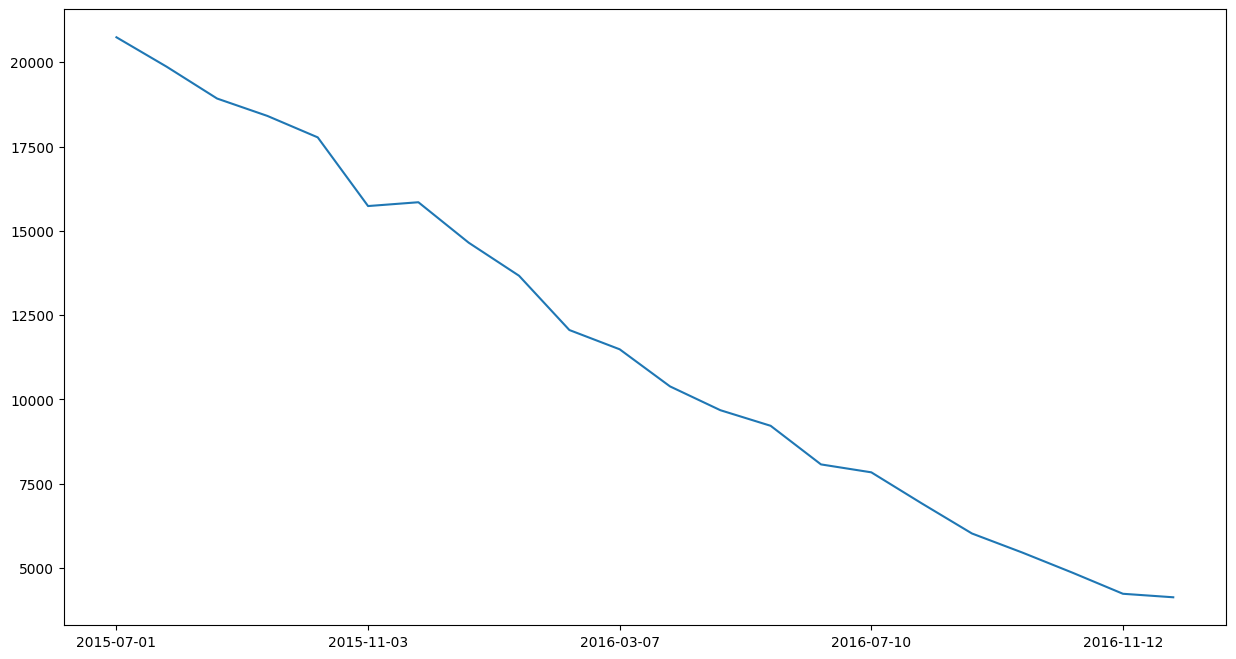

In [ ]:
#Visualizing Null-values count for all columns
plt.figure(figsize=(15, 8))
raw_data.isnull().sum()[range(1,550,25)].plot()
plt.show()

Null values are decreasing with Time.

This is possible as the Pages which were hosted / created towards later dates, will have null values for previous dates (dates before the page was created / hosted).

We will fill the missing data with linear intepolate.

In [ ]:
raw_data = raw_data.interpolate(method='linear')

In [ ]:
raw_data.isnull().sum()[range(1,550,25)]

2015-07-01    0
2015-07-26    0
2015-08-20    0
2015-09-14    0
2015-10-09    0
2015-11-03    0
2015-11-28    0
2015-12-23    0
2016-01-17    0
2016-02-11    0
2016-03-07    0
2016-04-01    0
2016-04-26    0
2016-05-21    0
2016-06-15    0
2016-07-10    0
2016-08-04    0
2016-08-29    0
2016-09-23    0
2016-10-18    0
2016-11-12    0
2016-12-07    0
dtype: int64

Null values are settled by linear interpolate.

**Separating the data**

The page name contains data in this format: SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

Every page address has indication of language
 like zh for chinese (2NE1_zh.wikipedia.org_all-access_spider) en for english and so on. Mapping of that as separate column language is required to identify the most used language.

In [ ]:
import re

#Function to Extract Language from Page using Regex
def get_language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 :
        return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
    else: return 'Unknown_language'
raw_data['language'] = raw_data['Page'].apply(get_language)


language_dict ={'de':'German',
                'en':'English',
                'es': 'Spanish',
                'fr': 'French',
                'ja': 'Japenese' ,
                'ru': 'Russian',
                'zh': 'Chinese',
                'Unknown_language': 'Unknown_language'}

raw_data['language'] = raw_data['language'].map(language_dict)

In [ ]:
raw_data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'language'],
      dtype='object', length=552)

**Visualizing the data and getting inferences from them**

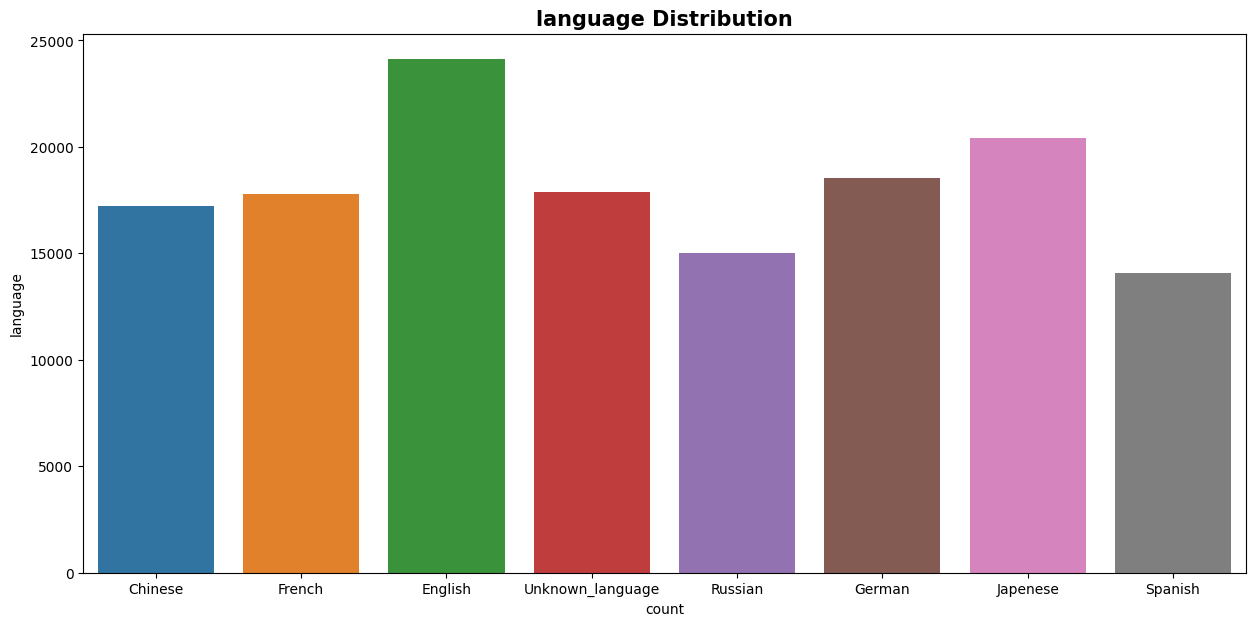

In [ ]:
#Visualizing distribution of various languages
y = 'language'

plt.figure(figsize=(15, 7))
san.countplot(x=y , data=raw_data)
plt.title(f' {y} Distribution')
plt.xlabel('count')
plt.ylabel(f'{y}')
plt.title(f'{y} Distribution', fontsize = 15, fontweight = 'bold')
plt.show()

Most frquently searched pages have language English and then Chinese There are almost 18000 entries having unknown language consits of other langauge like hindi, arabic parsi etc.

Page contains entry having three types of access right mobile-web, desktop and all-access eg in this page reference N-gramme_fr.wikipedia.org_desktop_all-agents have desktop access right.

In [ ]:
#Function to Extract Access Type from Page using Regex
def get_access_type(name):
    if len(re.findall(r'all-access|mobile|desktop', name)) == 1 :
        return re.findall(r'all-access|mobile|desktop', name)[0]
    else: return 'No Access_type'
#storing access right in separate column access_type
raw_data['access_type'] = raw_data['Page'].apply(get_access_type)

In [ ]:
raw_data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
       '2016-12-29', '2016-12-30', '2016-12-31', 'language', 'access_type'],
      dtype='object', length=553)

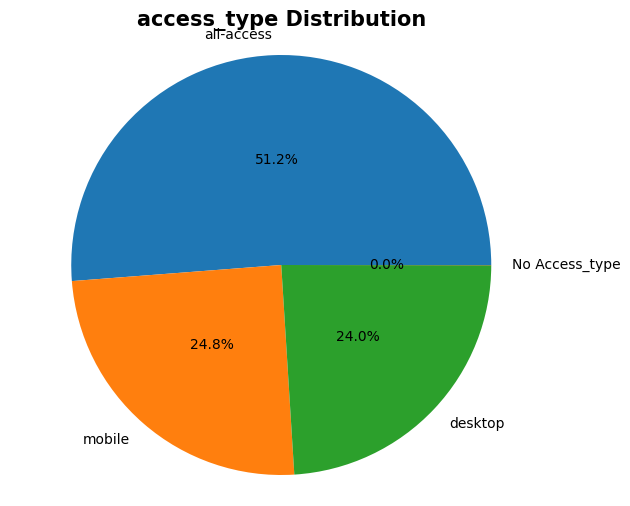

In [ ]:
#Visualizing Access types Distribution
var = 'access_type'
x = raw_data[var].value_counts().values
y = raw_data[var].value_counts().index

plt.figure(figsize=(7, 6))
plt.pie(x, labels = y, center=(0, 0), radius=1.5,  autopct='%1.1f%%', pctdistance=0.5)
plt.title(f'{var} Distribution', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

24.8% access by mobile 24% by desktop and 51.2% have all types. There is no any entry where access_type is not mentioned.

Page entry contains access origin like all_agent or spider like N-gramme_fr.wikipedia.org_desktop_all-agents has origin all_agents and 3C_zh.wikipedia.org_all-access_spider has spider.

In [ ]:
#Function to Extract Access Origin from Page using Regex
def get_access_origin(name):
    if len(re.findall(r'[ai].org_(.*)_(.*)$', name)) == 1 :
        return re.findall(r'[ai].org_(.*)_(.*)$', name)[0][1]
    else: return 'No Access_origin'

raw_data['access_origin'] = raw_data['Page'].apply(get_access_origin)

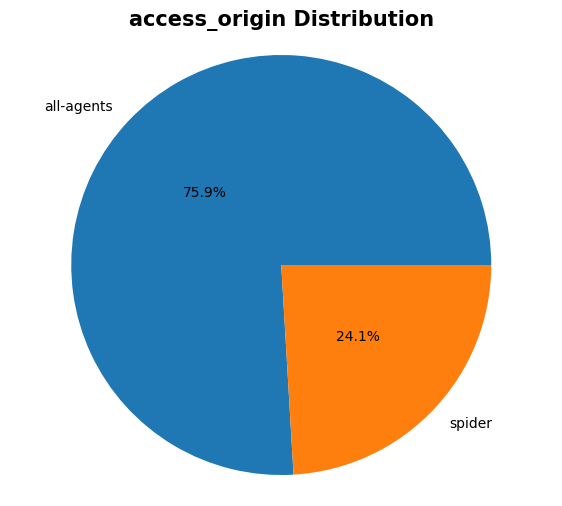

In [ ]:
#Visualizing Access Origin Distribution
var = 'access_origin'
x = raw_data[var].value_counts().values
y = raw_data[var].value_counts().index

plt.figure(figsize=(7, 6))
plt.pie(x, labels = y, center=(0, 0), radius=1.5,  autopct='%1.1f%%', pctdistance=0.5)
plt.title(f'{var} Distribution', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

All_agents in 65.9% page entries and spider in 24.%.

Creating dataframe: mean page visit per language

In [ ]:
raw_data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
       '2016-12-30', '2016-12-31', 'language', 'access_type', 'access_origin'],
      dtype='object', length=554)

In [ ]:
data_language = pd.DataFrame()
data_language = raw_data.groupby('language').mean().transpose()
data_language.reset_index(inplace = True)
data_language.set_index('index', inplace = True)
data_language

<ipython-input-34-2794984ec736>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_language = raw_data.groupby('language').mean().transpose()


language,Chinese,English,French,German,Japenese,Russian,Spanish,Unknown_language
index,,,,,,,,
2015-07-01,302.355734,4427.708334,1129.034804,790.590708,601.360077,651.452513,1209.966616,108.211419
2015-07-02,268.117246,4392.444278,502.047865,775.655888,687.995484,655.053777,1160.710520,113.440469
2015-07-03,267.042942,4166.937545,484.547462,745.781675,616.659299,609.369040,1056.724289,106.139837
2015-07-04,259.622370,4322.986667,526.252510,678.666147,776.318452,572.553909,992.046323,94.004793
2015-07-05,277.441749,4482.500642,507.830786,791.054515,750.043471,628.859743,1077.227063,102.609024
...,...,...,...,...,...,...,...,...
2016-12-27,379.421063,6063.200286,859.794574,1116.103251,809.202535,1003.665424,1158.401166,160.771437
2016-12-28,382.057316,5889.543575,776.484440,1063.900065,810.996280,934.810545,1205.359265,211.380202
2016-12-29,354.920570,6268.441202,754.271205,1022.153879,887.976041,900.150945,1134.708330,160.458163


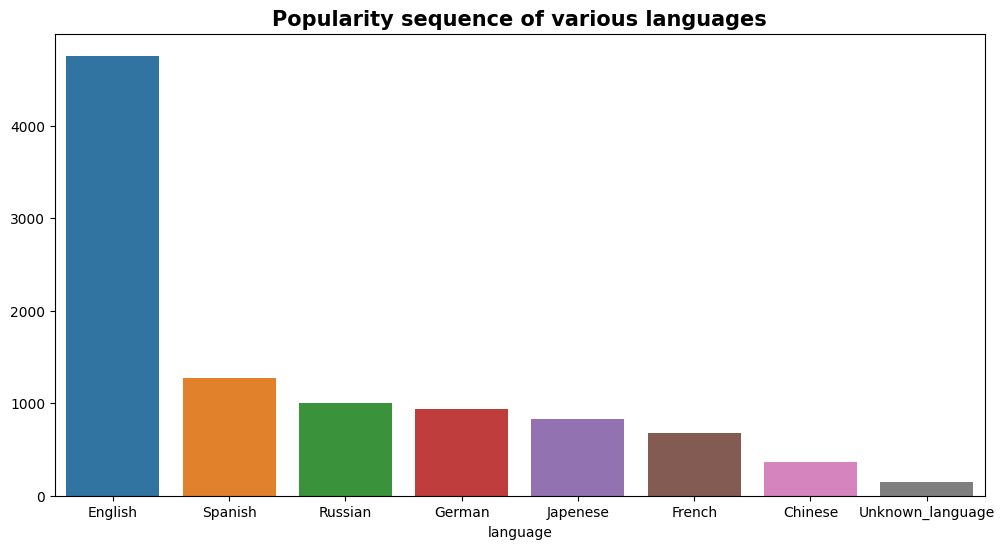

In [ ]:
x = data_language.mean().sort_values(ascending = False).index
y = data_language.mean().sort_values(ascending = False).values

plt.figure(figsize=(12, 6))
san.barplot(x=x,y=y)
plt.title(f'Popularity sequence of various languages', fontsize = 15, fontweight = 'bold')
plt.show()

## Popularity sequence of various languages : English > Spanish > Russian > German > Japenese > French > Chinese

English is the most popular language, next is Spanish almost 1/ 3 of English.

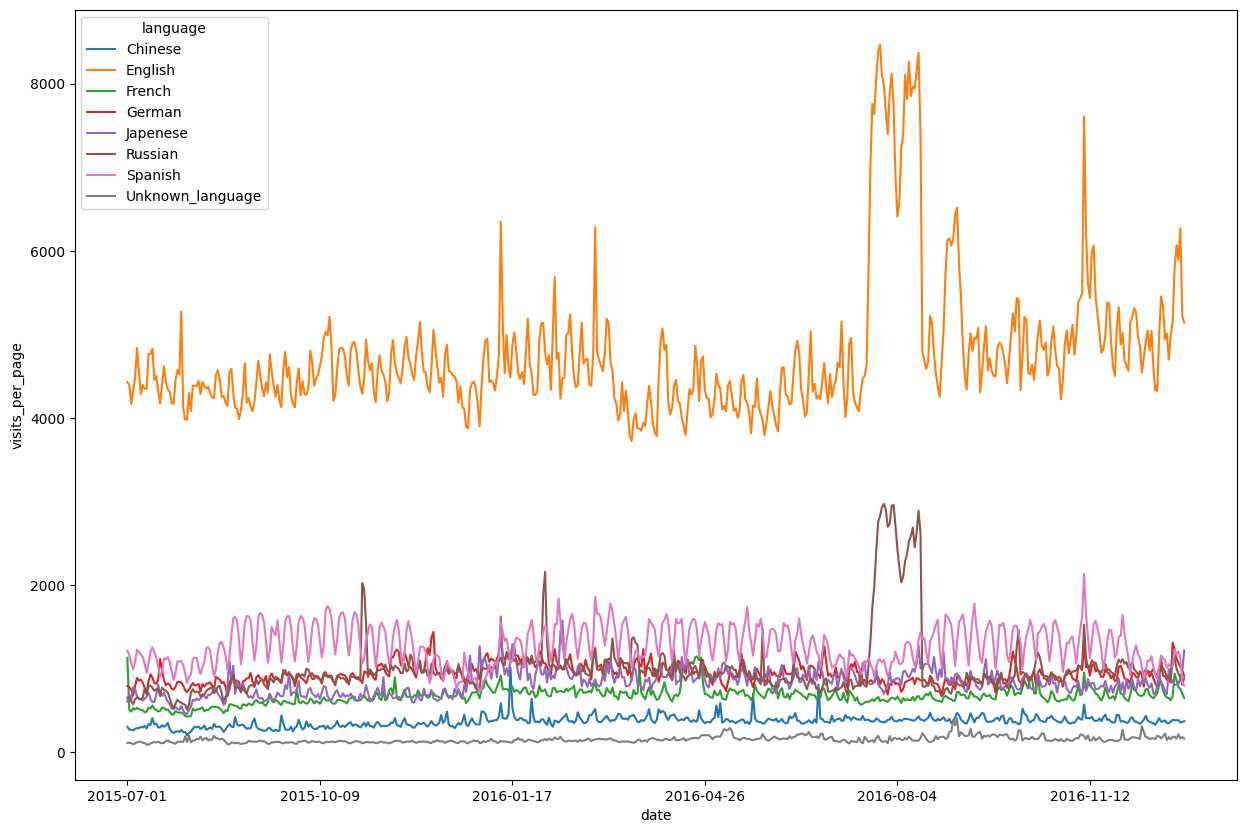

In [ ]:
data_language.plot(label = data_language.columns,  figsize=(15, 10))
plt.xlabel("date")
plt.ylabel("visits_per_page")
plt.show()

In 2016 August sudden rise of English and Russian language was seen.

In [ ]:
data_language.columns

Index(['Chinese', 'English', 'French', 'German', 'Japenese', 'Russian',
       'Spanish', 'Unknown_language'],
      dtype='object', name='language')

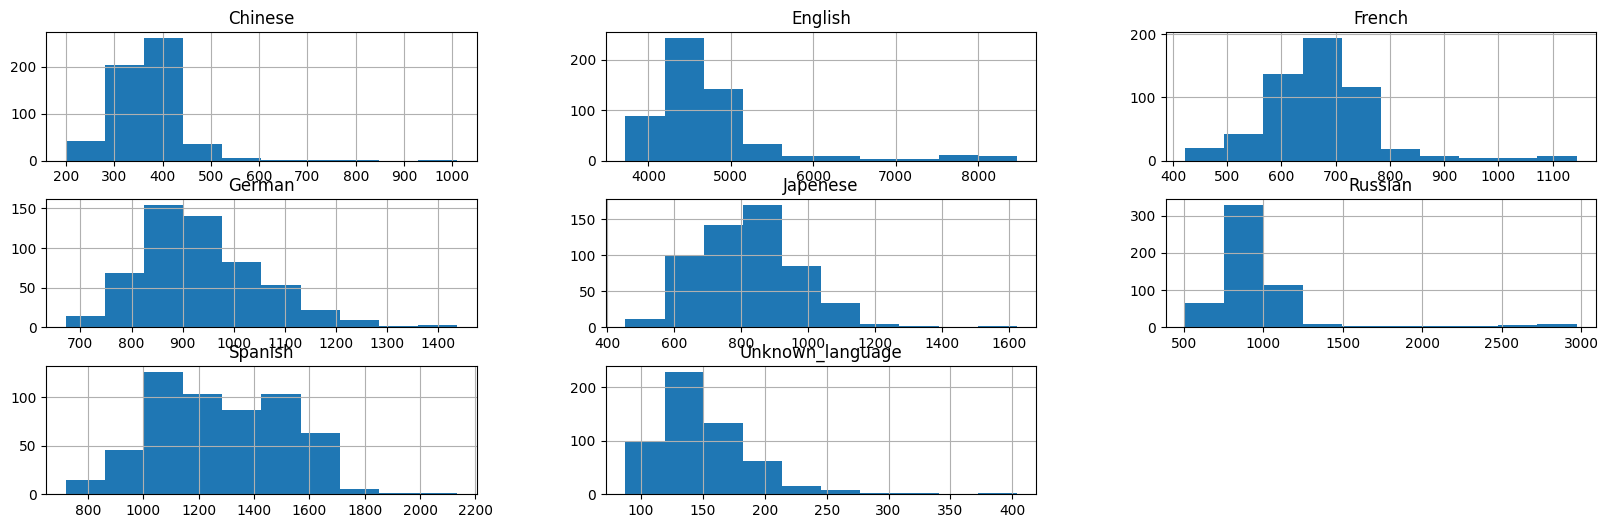

In [ ]:
data_language.hist();

**Checking Stationarity using ADF (Augmented Dickey Fuller) Test**

ADF Test

Null Hypothesis: The series has a unit root (value of a=1). The series is non-stationary.

Alternate Hypothesis: The series has no unit root. The series is stationary.

If we fail to reject the null hypothesis, we can say that the series is non-stationary.

If p_value < 0.05 (alpha) or test statistic is less than the critical value, then we can reject the null hypothesis (aka the series is stationary)

In [ ]:
#define function for ADF test
import statsmodels
from statsmodels.tsa.stattools import adfuller
def adf_test(data, significance_level=0.05):
    pvalue = statsmodels.tsa.stattools.adfuller(data)[1]
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

In [ ]:
#apply adf test on the series
adf_test(data_language['English'])

Sequence is not stationary


The test statistic > critical value / p_value > 5%.
This implies that the series is not stationary.

In [ ]:
ts_english = data_language.English.values


**Decomposition of series.**

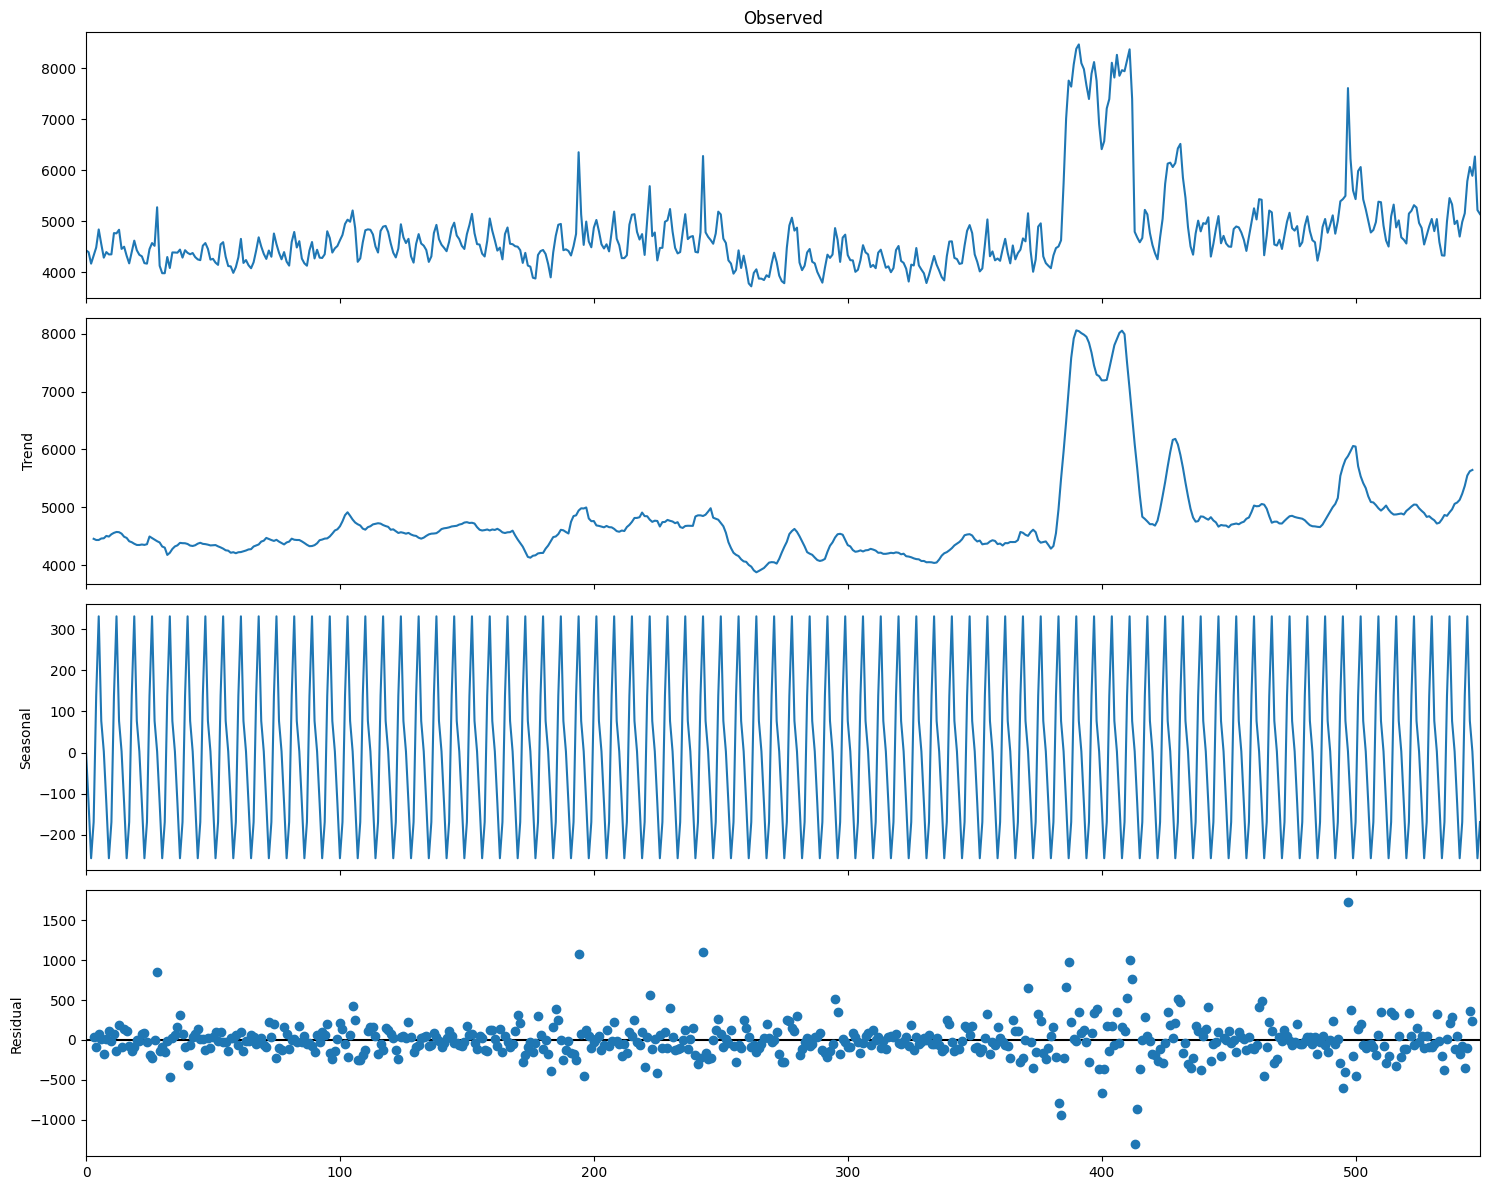

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_english, model='additive', period=7)

fig = decomposition.plot()
fig.set_size_inches((15, 12))
fig.tight_layout()
plt.show()

In [ ]:
residual = pd.DataFrame(decomposition.resid).fillna(0)[0].values
adf_test(residual)

Sequence is stationary


The test statistic < critical value / p_value < 5%.
From ADF (Augmented Dickey Fuller) Test it can be shown that Residuals from time-series decomposition is Stationary

**Estimating (p,q,d) & Interpreting ACF and PACF plots**

<Axes: >

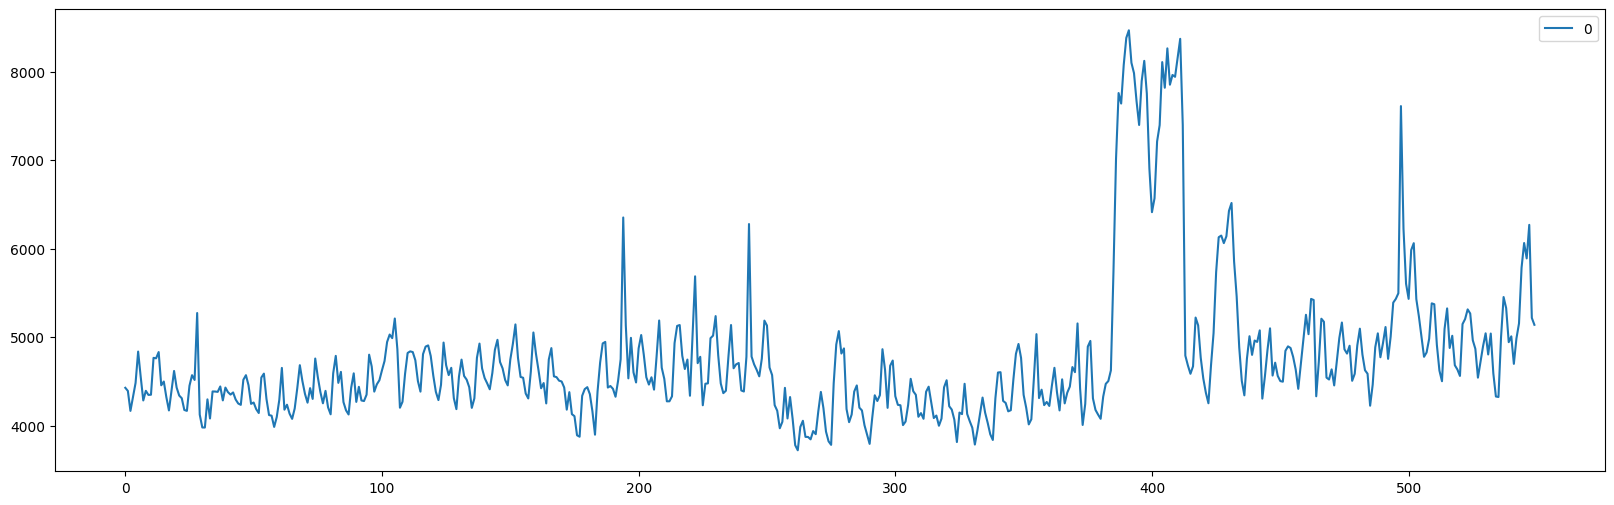

In [ ]:
#plotting of original data
ts_english =pd.DataFrame(ts_english)
ts_english.plot()

**Differencing**

In [ ]:
# remove trend
ts_diff = pd.DataFrame(ts_english).diff(1)
ts_diff.dropna(inplace = True)


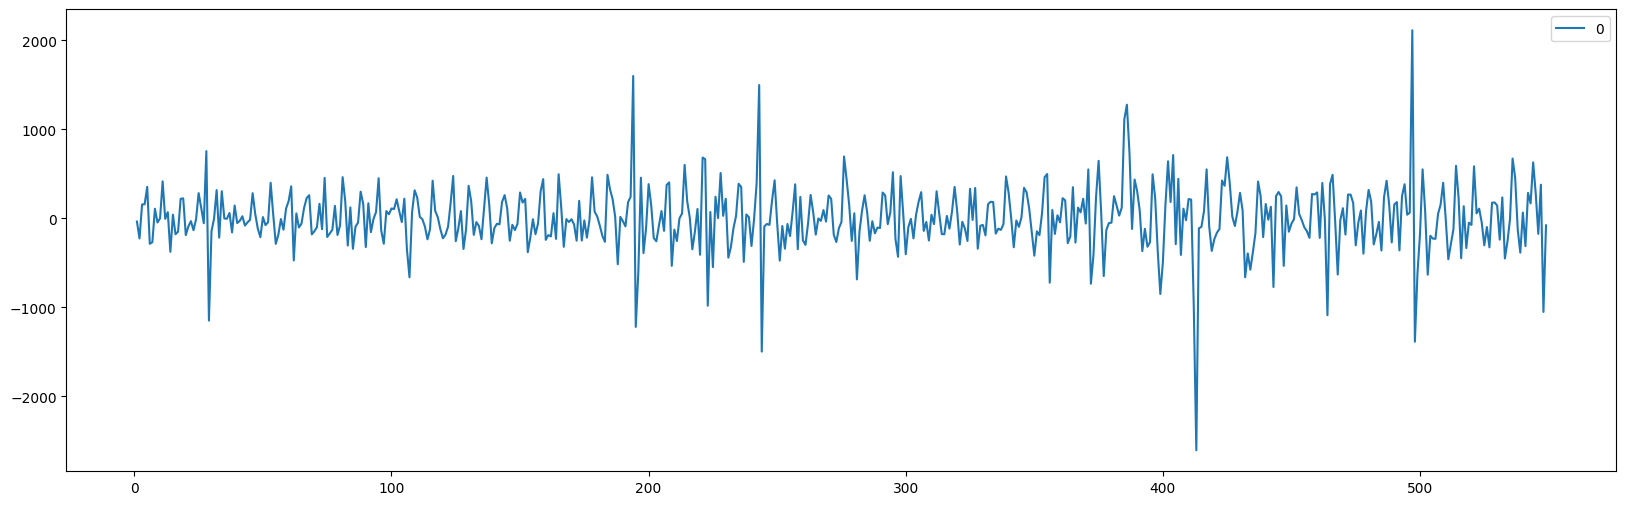

In [ ]:
ts_diff.plot()
plt.show()

In [ ]:
adf_test(ts_diff)

Sequence is stationary


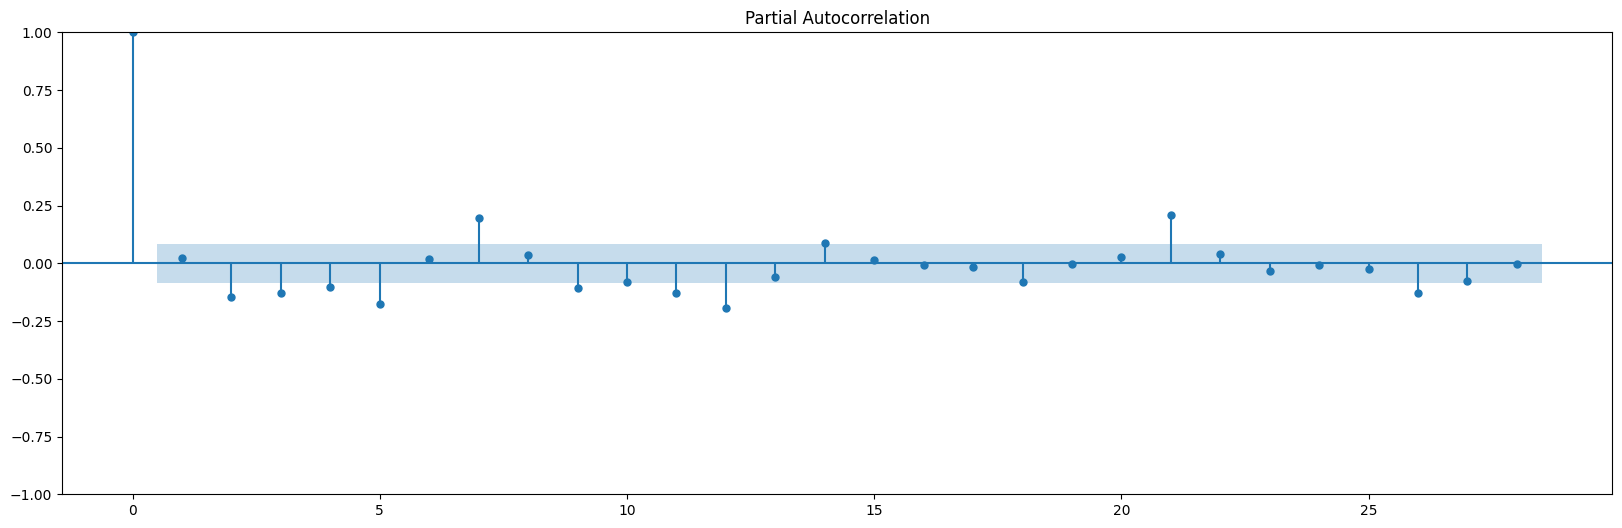

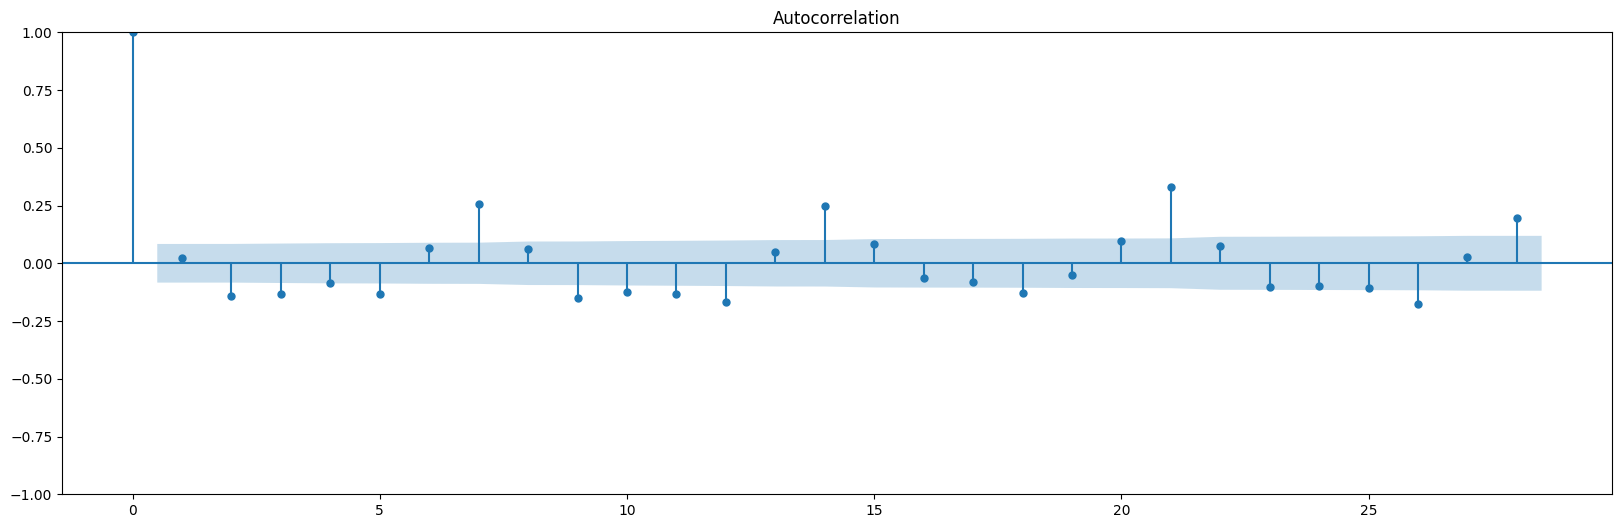

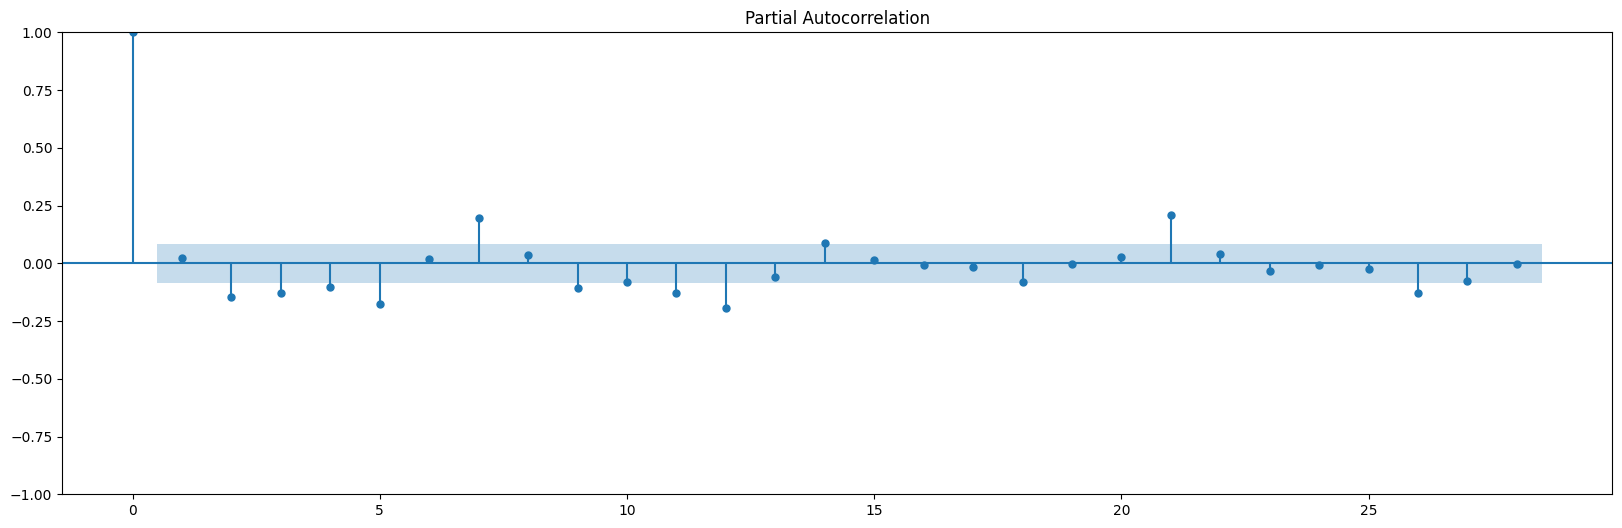

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_diff)
plot_pacf(ts_diff)

**Creating model training and forecasting with ARIMA**

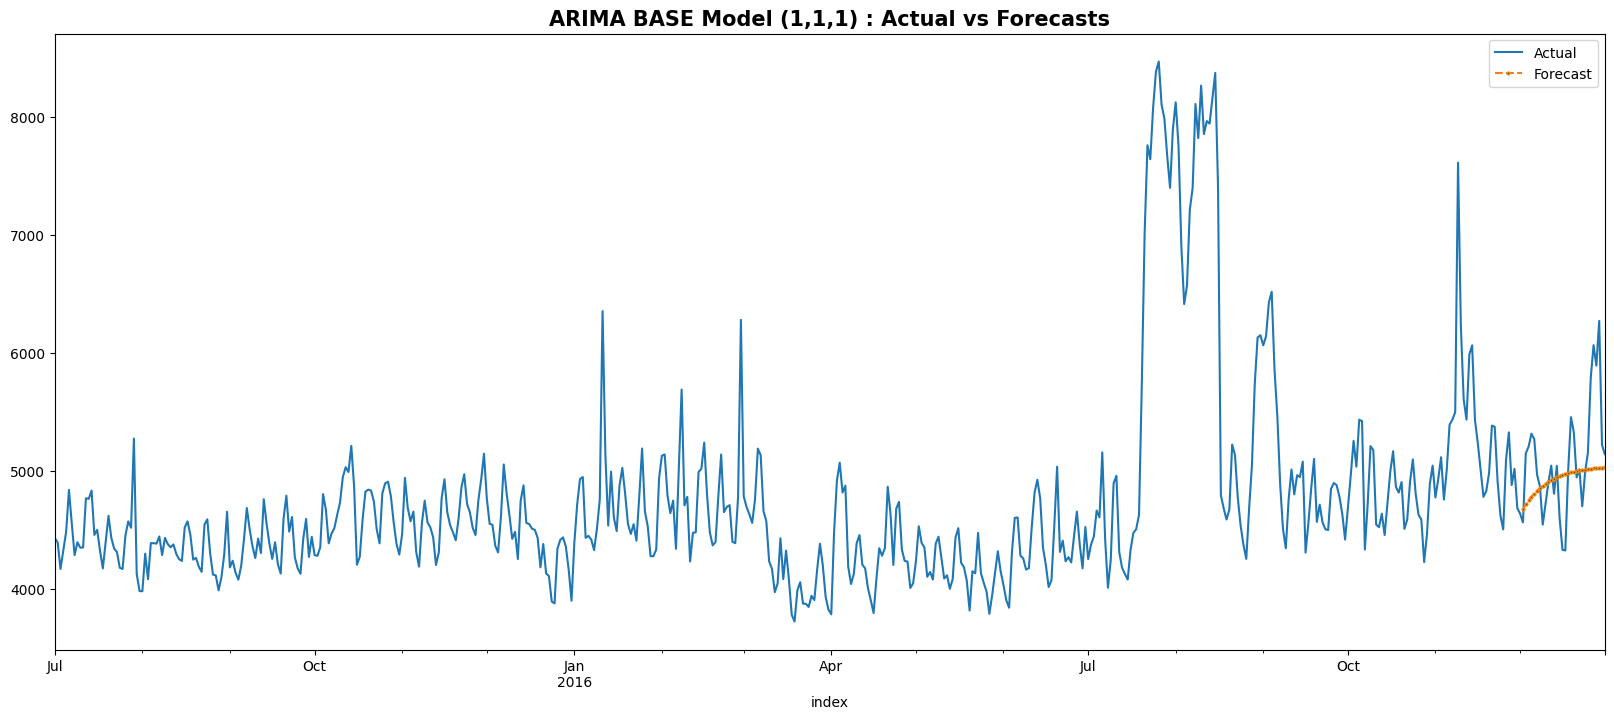

--------------------------------------------------------------------------------
MAPE of Model : 0.06477
--------------------------------------------------------------------------------
RMSE of Model : 466.891
--------------------------------------------------------------------------------


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

import warnings # supress warnings
warnings.filterwarnings('ignore')


n = 30
time_series = data_language.English.copy(deep = True)
#Creating Base ARIMA Model with order(1,1,1)
model = ARIMA(time_series[:-n], order =(1,1,1))
model_fit = model.fit()

#Creating forecast for last n-values
forecast = model_fit.forecast(steps = n, alpha = 0.05)

#plotting Actual & Forecasted values
time_series.index = time_series.index.astype('datetime64[ns]')
forecast.index = forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (20,8))
time_series.plot(label = 'Actual')
forecast.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='green', markersize=2)
plt.legend(loc="upper right")
plt.title('ARIMA BASE Model (1,1,1) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()


#Calculating MAPE & RMSE
actuals = time_series.values[-n:]
errors = time_series.values[-n:] - forecast.values

mape = np.mean(np.abs(errors)/ np.abs(actuals))
rmse = np.sqrt(np.mean(errors**2))

print('-'*80)
print(f'MAPE of Model : {np.round(mape,5)}')
print('-'*80)
print(f'RMSE of Model : {np.round(rmse,3)}')
print('-'*80)

**Creating model training and forecasting with SARIMAX**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):

    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s)
    model = SARIMAX(time_series[:-n], \
                    order =(p,d,q),
                    seasonal_order=(P, D, Q, s),
                    exog = exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()

    #Creating forecast for last n-values
    model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))

    #plotting Actual & Forecasted values
    time_series.index = time_series.index.astype('datetime64[ns]')
    model_forecast.index = model_forecast.index.astype('datetime64[ns]')
    plt.figure(figsize = (20,8))
    time_series[-60:].plot(label = 'Actual')
    model_forecast[-60:].plot(label = 'Forecast', color = 'red',
                              linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
    plt.show()

    #Calculating MAPE & RMSE
    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors)/ np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    print('-'*80)
    print(f'MAPE of Model : {np.round(mape,5)}')
    print('-'*80)
    print(f'RMSE of Model : {np.round(rmse,3)}')
    print('-'*80)

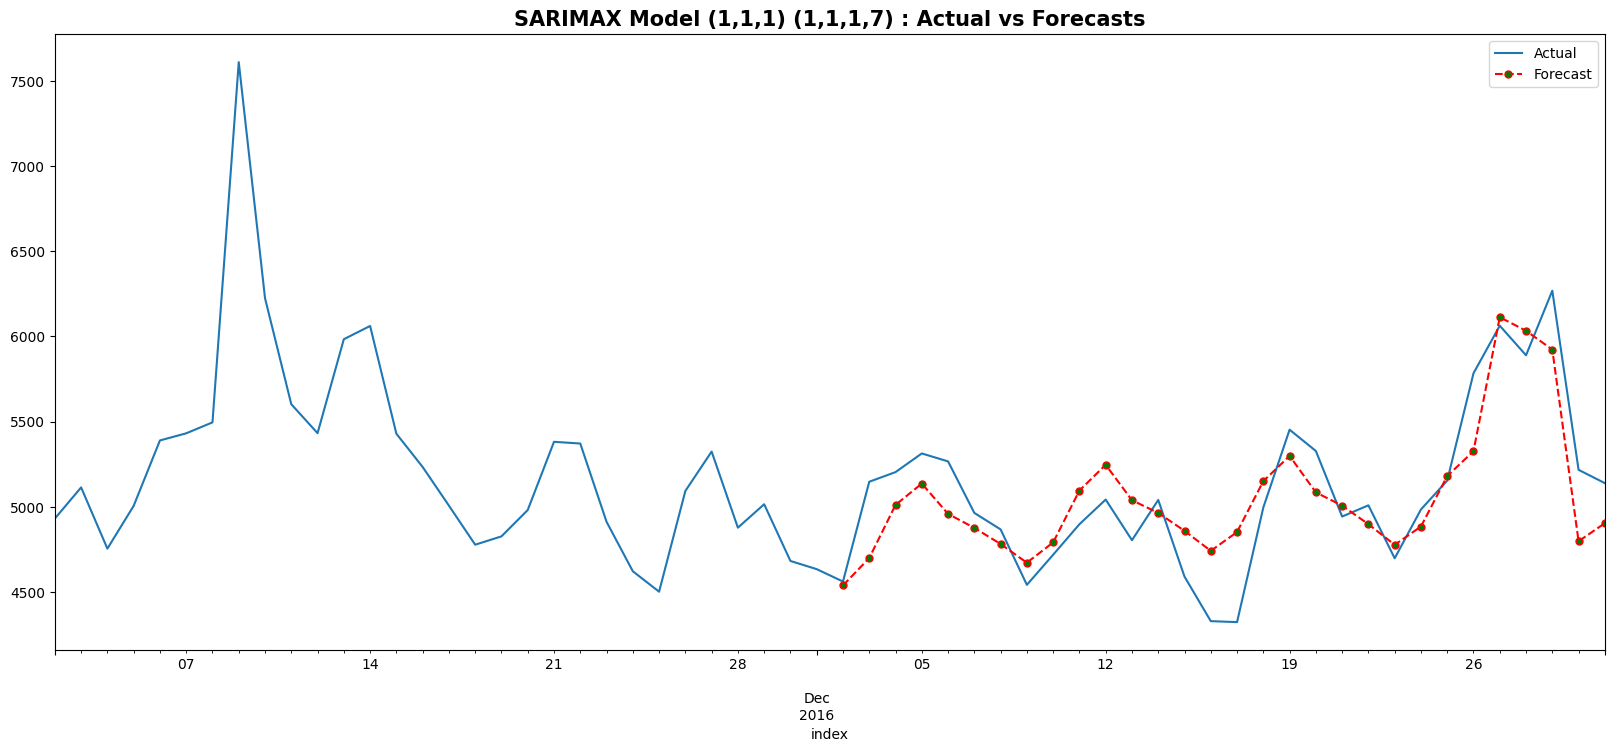

--------------------------------------------------------------------------------
MAPE of Model : 0.03985
--------------------------------------------------------------------------------
RMSE of Model : 244.074
--------------------------------------------------------------------------------


In [ ]:
#Checking a SARIMAX model with seasonality (p,d,q,P,D,Q,s = 1,1,1,1,1,1,7)
exog = exo_data['Exog'].to_numpy()
time_series = data_language.English
test_size= 0.1
p,d,q, P,D,Q,s = 1,1,1,1,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

**Searching for best parameters for SARIMAX model**

In [ ]:
def sarimax_grid_search(time_series, n, param, d_param, s_param, exog = []):
    counter = 0
    #creating df for storing results summary
    param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])

    #Creating loop for every paramater to fit SARIMAX model
    for p in param:
        for d in d_param:
            for q in param:
                for P in param:
                    for D in d_param:
                        for Q in param:
                            for s in s_param:
                                #Creating Model
                                model = SARIMAX(time_series[:-n],
                                                order=(p,d,q),
                                                seasonal_order=(P, D, Q, s),
                                                exog = exog[:-n],
                                                initialization='approximate_diffuse')
                                model_fit = model.fit()

                                #Creating forecast from Model
                                model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))

                                #Calculating errors for results
                                actuals = time_series.values[-n:]
                                errors = time_series.values[-n:] - model_forecast.values

                                #Calculating MAPE & RMSE
                                mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                rmse = np.sqrt(np.mean(errors**2))
                                mape = np.round(mape,5)
                                rmse = np.round(rmse,3)

                                #Storing the results in param_df
                                counter += 1
                                list_row = [counter, (p,d,q), (P,D,Q,s), mape, rmse]
                                param_df.loc[len(param_df)] = list_row

                #print statement to check progress of Loop
                print(f'Possible Combination: {counter} out of { (len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

    return param_df

**#Finding best parameters for English time series**

In [ ]:

#Finding best parameters for English time series

exog = exo_data['Exog'].to_numpy()
time_series = data_language.English
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]

english_params  = sarimax_grid_search(time_series, n, param, d_param,s_param, exog)

Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculated
Possible Combination: 324 out of 324 calculated


In [ ]:
english_params.sort_values(['mape', 'rmse']).head()

,serial,pdq,PDQs,mape,rmse
214,215,"(1, 1, 2)","(2, 1, 1, 7)",0.03959,246.836
293,294,"(2, 1, 1)","(0, 1, 2, 7)",0.03960,243.672
298,299,"(2, 1, 1)","(1, 1, 1, 7)",0.03963,245.626
304,305,"(2, 1, 1)","(2, 1, 1, 7)",0.03965,245.727
311,312,"(2, 1, 2)","(0, 1, 2, 7)",0.03969,243.440


The best hyperparameters for English Language for Sarimax model is 215	(1, 1, 2)	(2, 1, 1, 7)	0.03959	246.836

**Function to fetch best parameters for each language**

In [ ]:
#Function to fetch best parameters for each language

def pipeline_sarimax_grid_search_without_exog(languages, data_language, n, param, d_param, s_param):

    best_param_df  = pd.DataFrame(columns = ['language','p','d', 'q', 'P','D','Q','s','mape'])
    for lang in languages:
        print('')
        print('')
        print(f'--------------------------------------------------------------')
        print(f'          Finding best parameters for {lang}                  ')
        print(f'--------------------------------------------------------------')
        counter = 0
        time_series = data_language[lang]
        #creating df for storing results summary
        #param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])
        best_mape = 100

        #Creating loop for every paramater to fit SARIMAX model
        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    #Creating Model
                                    model = SARIMAX(time_series[:-n],
                                                    order=(p,d,q),
                                                    seasonal_order=(P, D, Q, s),
                                                    initialization='approximate_diffuse')
                                    model_fit = model.fit()

                                    #Creating forecast from Model
                                    model_forecast = model_fit.forecast(n, dynamic = True)

                                    #Calculating errors for results
                                    actuals = time_series.values[-n:]
                                    errors = time_series.values[-n:] - model_forecast.values

                                    #Calculating MAPE & RMSE
                                    mape = np.mean(np.abs(errors)/ np.abs(actuals))

                                    counter += 1

                                    if (mape < best_mape):
                                        best_mape = mape
                                        best_p = p
                                        best_d = d
                                        best_q = q
                                        best_P = P
                                        best_D = D
                                        best_Q = Q
                                        best_s = s
                                    else: pass

                    #print statement to check progress of Loop
                    print(f'Possible Combination: {counter} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

        best_mape = np.round(best_mape, 5)
        print(f'--------------------------------------------------------------')
        print(f'Minimum MAPE for {lang} = {best_mape}')
        print(f'Corresponding Best Parameters are {best_p , best_d, best_q, best_P, best_D, best_Q, best_s}')
        print(f'--------------------------------------------------------------')

        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
        best_param_df.loc[len(best_param_df)] = best_param_row

    return best_param_df

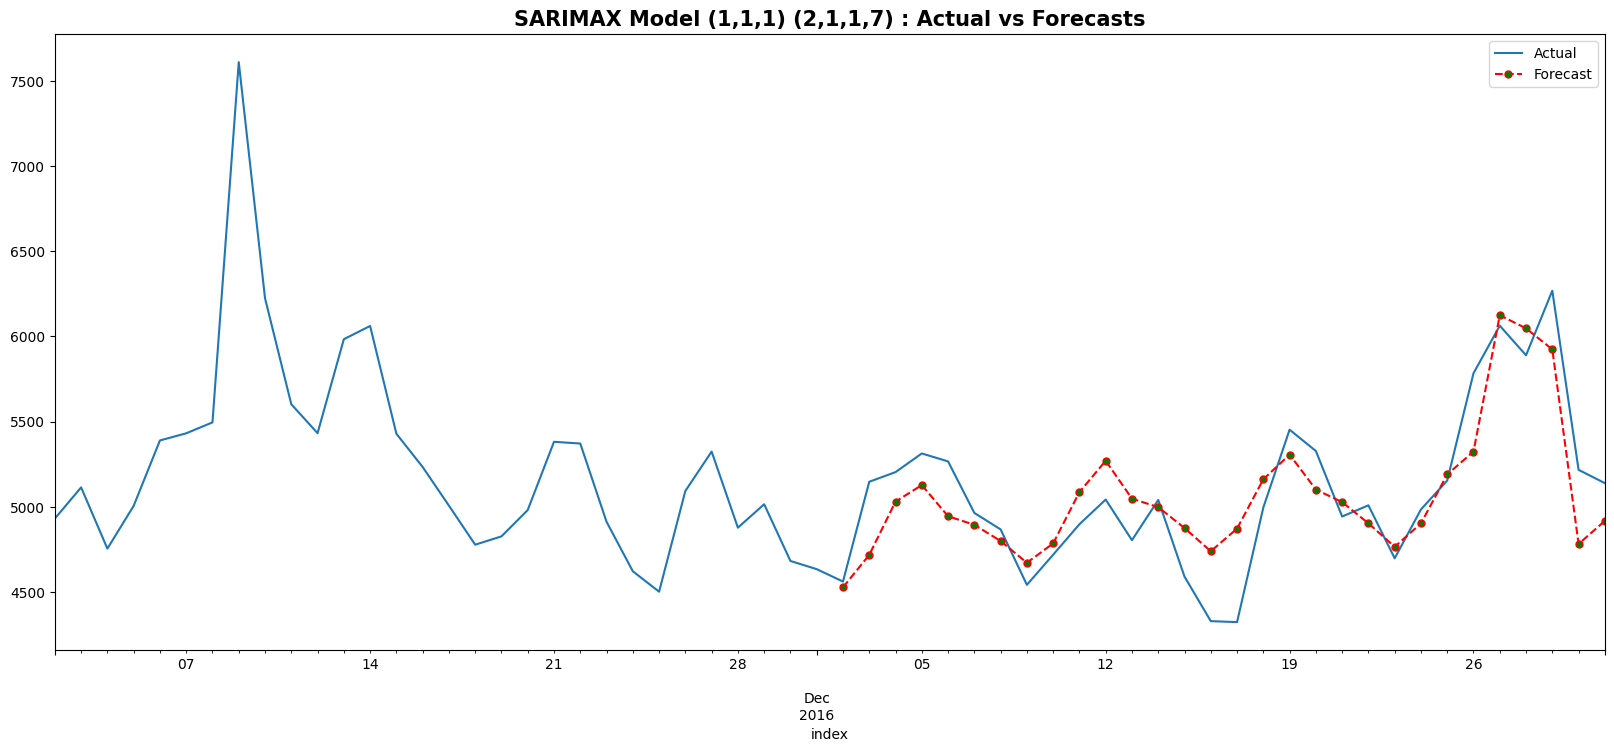

--------------------------------------------------------------------------------
MAPE of Model : 0.03977
--------------------------------------------------------------------------------
RMSE of Model : 245.641
--------------------------------------------------------------------------------


In [ ]:
#Plotting the SARIMAX model corresponding to best parameters
exog = exo_data['Exog'].to_numpy()
time_series = data_language.English
p,d,q, P,D,Q,s = 1,1,1, 2,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

**calculating best parameters for all languages**

In [ ]:

#calculating best parameters for all languages
languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]


best_param_df = pipeline_sarimax_grid_search_without_exog(languages, data_language, n, param, d_param, s_param)



--------------------------------------------------------------
          Finding best parameters for Chinese                  
--------------------------------------------------------------
Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculat

In [ ]:
best_param_df.sort_values(['mape'], inplace = True)
best_param_df

,language,p,d,q,P,D,Q,s,mape
0,Chinese,0,0,2,2,0,1,7,0.03379
4,Russian,2,0,2,2,0,2,7,0.05002
1,French,0,0,2,2,1,2,7,0.06224
2,German,1,0,1,2,0,1,7,0.06312
3,Japenese,0,0,2,0,1,1,7,0.07282
5,Spanish,1,1,0,1,0,1,7,0.09193


In [ ]:
#Function to plot SARIMAX model for each Language

def plot_best_SARIMAX_model(languages, data_language, n, best_param_df):

    for lang in languages:
        #fetching respective best parameters for that language
        p = best_param_df.loc[best_param_df['language'] == lang, ['p']].values[0][0]
        d = best_param_df.loc[best_param_df['language'] == lang, ['d']].values[0][0]
        q = best_param_df.loc[best_param_df['language'] == lang, ['q']].values[0][0]
        P = best_param_df.loc[best_param_df['language'] == lang, ['P']].values[0][0]
        D = best_param_df.loc[best_param_df['language'] == lang, ['D']].values[0][0]
        Q = best_param_df.loc[best_param_df['language'] == lang, ['Q']].values[0][0]
        s = best_param_df.loc[best_param_df['language'] == lang, ['s']].values[0][0]

        #Creating language time-series
        time_series = data_language[lang]

        #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s)
        model = SARIMAX(time_series[:-n],
                        order =(p,d,q),
                        seasonal_order=(P, D, Q, s),
                        initialization='approximate_diffuse')
        model_fit = model.fit()

        #Creating forecast for last n-values
        model_forecast = model_fit.forecast(n, dynamic = True)

        #Calculating MAPE & RMSE
        actuals = time_series.values[-n:]
        errors = time_series.values[-n:] - model_forecast.values

        mape = np.mean(np.abs(errors)/ np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))

        print('')
        print('')
        print(f'-----------------------------------------------------------------------------------------')
        print(f'        SARIMAX model for {lang} Time Series                                             ')
        print(f'        Parameters of Model : ({p},{d},{q}) ({P},{D},{Q},{s})                            ')
        print(f'        MAPE of Model       : {np.round(mape,5)}                                         ')
        print(f'        RMSE of Model       : {np.round(rmse,3)}                                         ')
        print(f'-----------------------------------------------------------------------------------------')

        #plotting Actual & Forecasted values
        time_series.index = time_series.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize = (20,8))
        time_series[-60:].plot(label = 'Actual')
        model_forecast[-60:].plot(label = 'Forecast', color = 'red',
                                  linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
        plt.legend(loc="upper right")
        plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
        plt.show()

    return 0



-----------------------------------------------------------------------------------------
        SARIMAX model for Chinese Time Series                                             
        Parameters of Model : (0,0,2) (2,0,1,7)                            
        MAPE of Model       : 0.03379                                         
        RMSE of Model       : 16.058                                         
-----------------------------------------------------------------------------------------


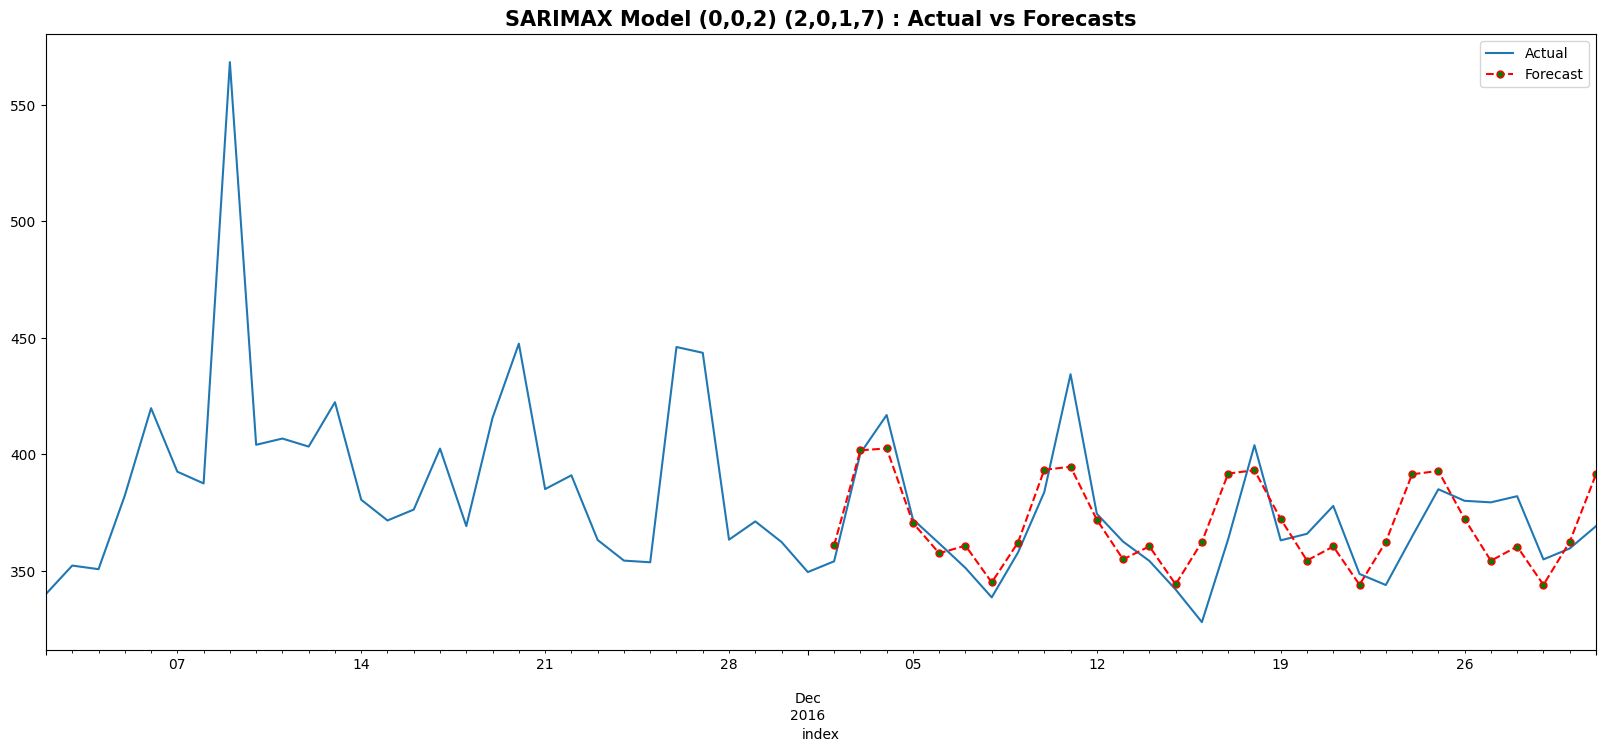



-----------------------------------------------------------------------------------------
        SARIMAX model for French Time Series                                             
        Parameters of Model : (0,0,2) (2,1,2,7)                            
        MAPE of Model       : 0.06224                                         
        RMSE of Model       : 69.82                                         
-----------------------------------------------------------------------------------------


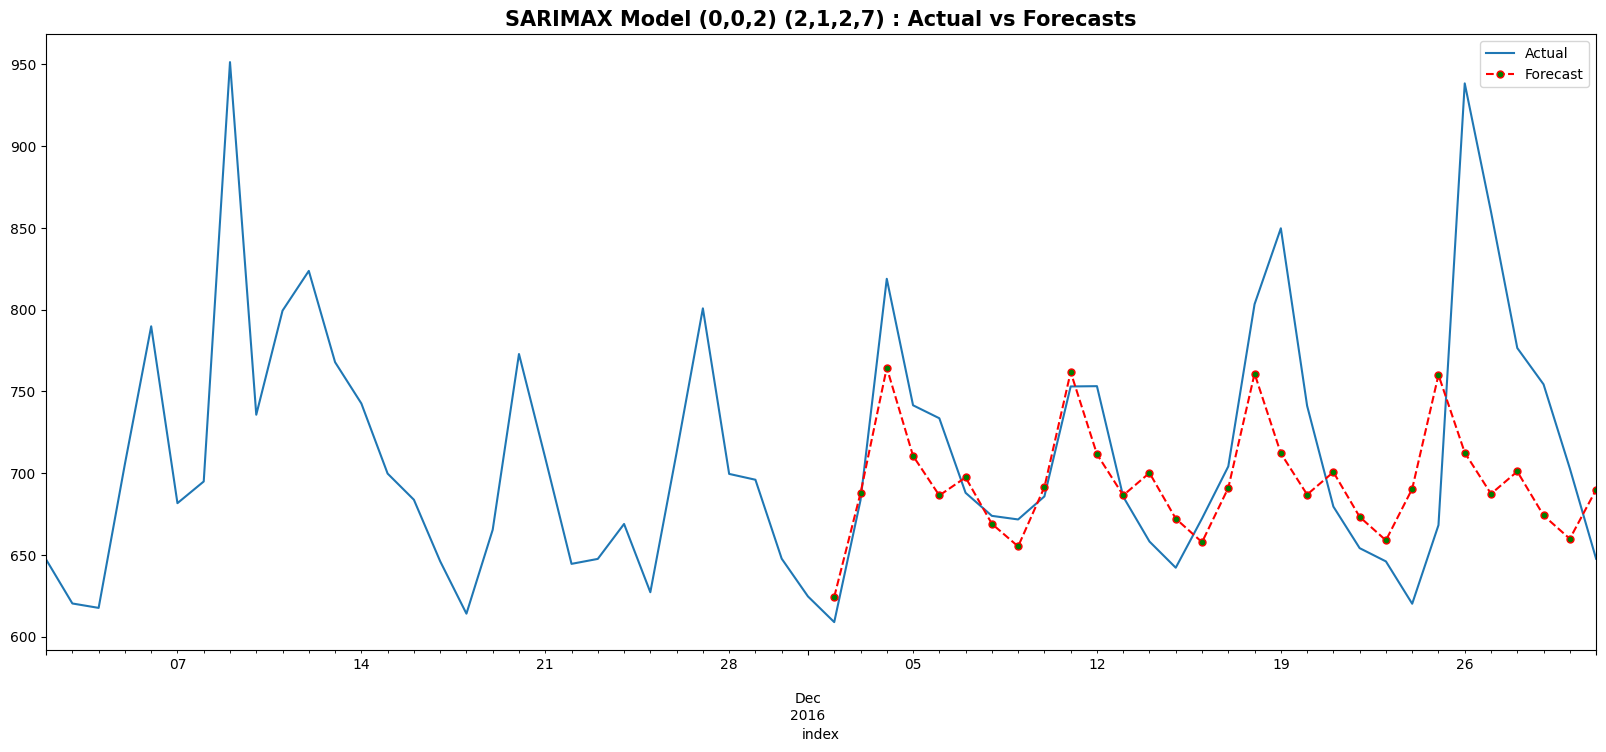



-----------------------------------------------------------------------------------------
        SARIMAX model for German Time Series                                             
        Parameters of Model : (1,0,1) (2,0,1,7)                            
        MAPE of Model       : 0.06312                                         
        RMSE of Model       : 105.466                                         
-----------------------------------------------------------------------------------------


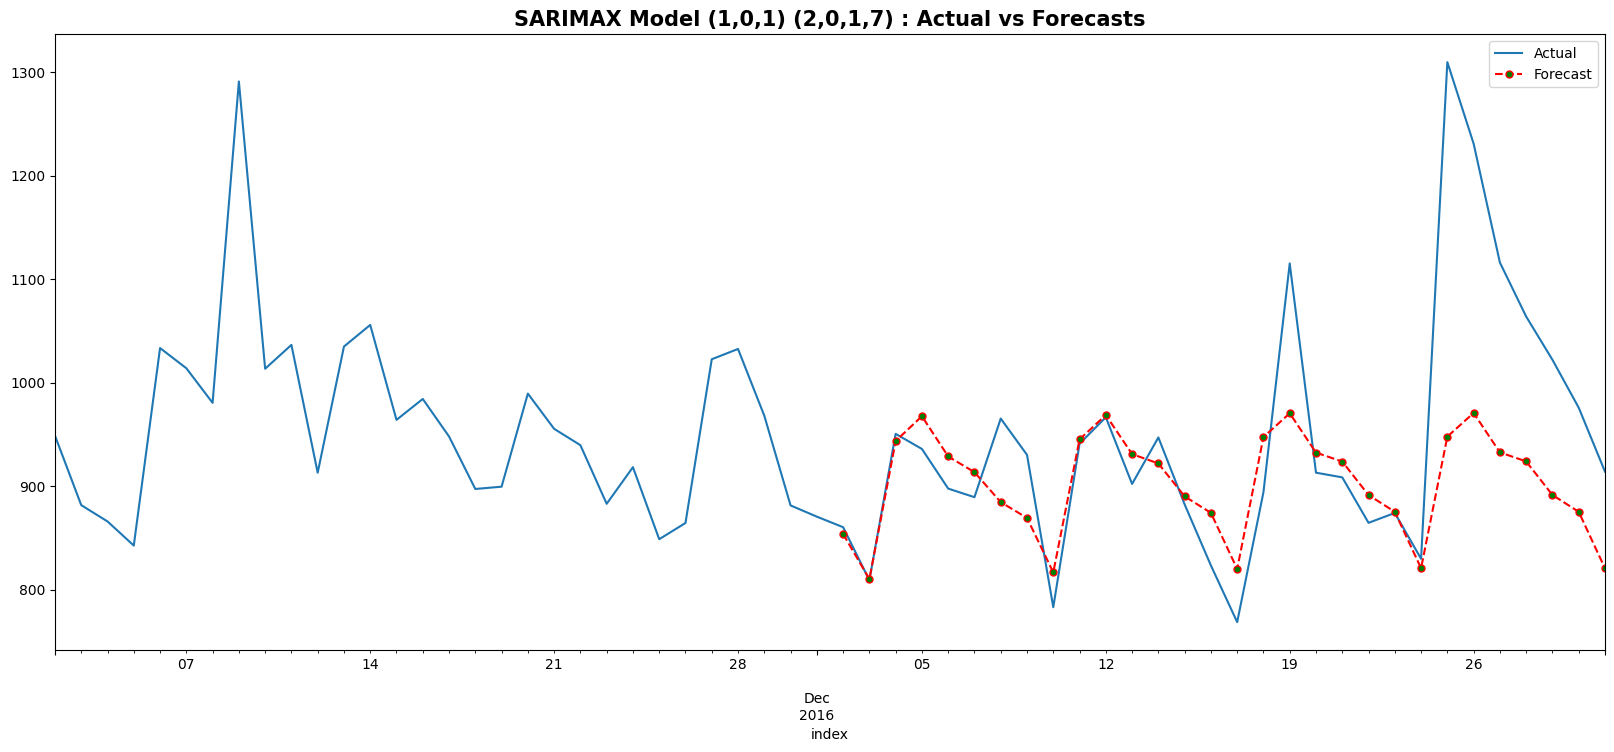



-----------------------------------------------------------------------------------------
        SARIMAX model for Japenese Time Series                                             
        Parameters of Model : (0,0,2) (0,1,1,7)                            
        MAPE of Model       : 0.07282                                         
        RMSE of Model       : 99.564                                         
-----------------------------------------------------------------------------------------


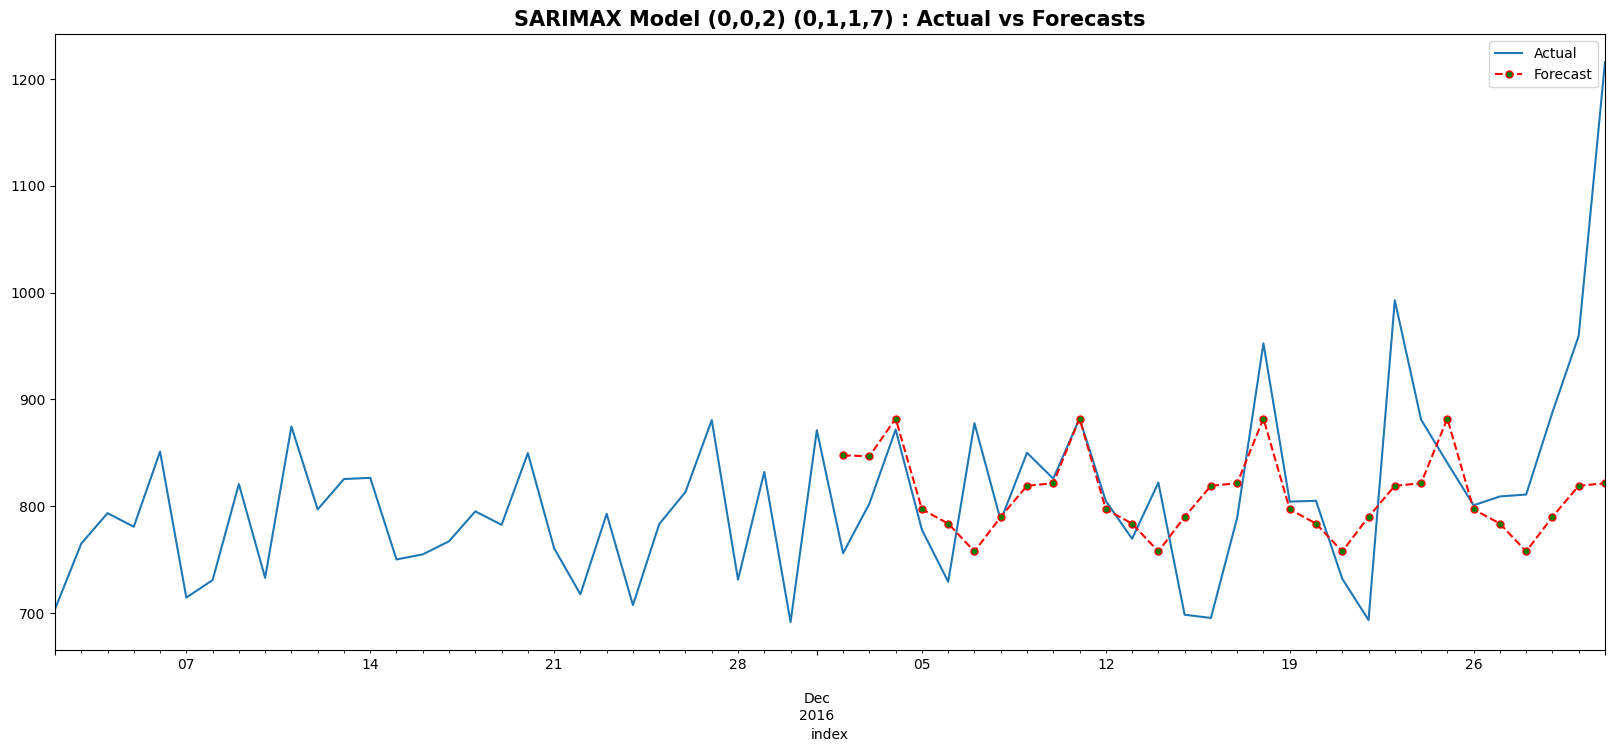



-----------------------------------------------------------------------------------------
        SARIMAX model for Russian Time Series                                             
        Parameters of Model : (2,0,2) (2,0,2,7)                            
        MAPE of Model       : 0.05002                                         
        RMSE of Model       : 67.533                                         
-----------------------------------------------------------------------------------------


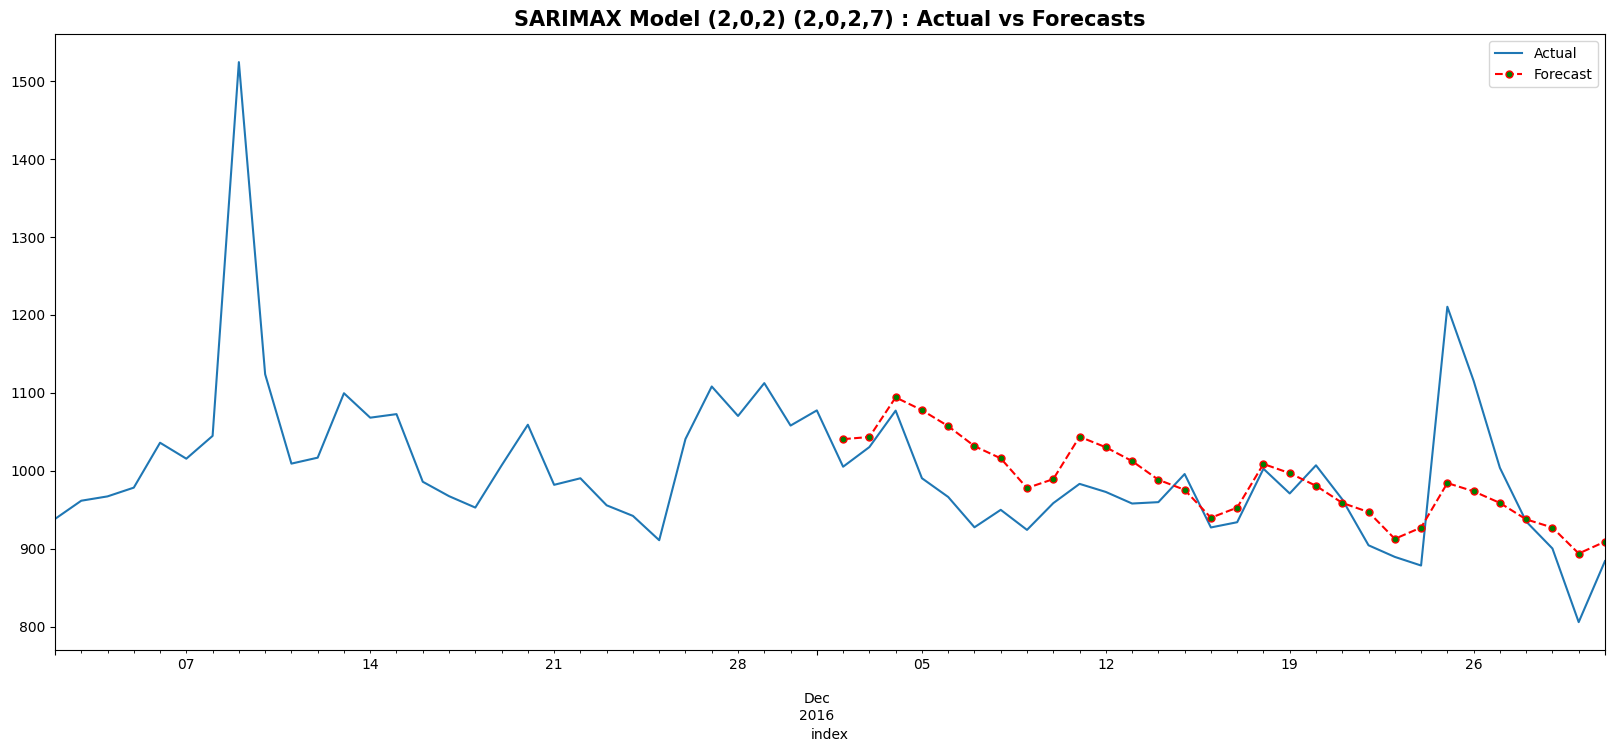



-----------------------------------------------------------------------------------------
        SARIMAX model for Spanish Time Series                                             
        Parameters of Model : (1,1,0) (1,0,1,7)                            
        MAPE of Model       : 0.09193                                         
        RMSE of Model       : 123.61                                         
-----------------------------------------------------------------------------------------


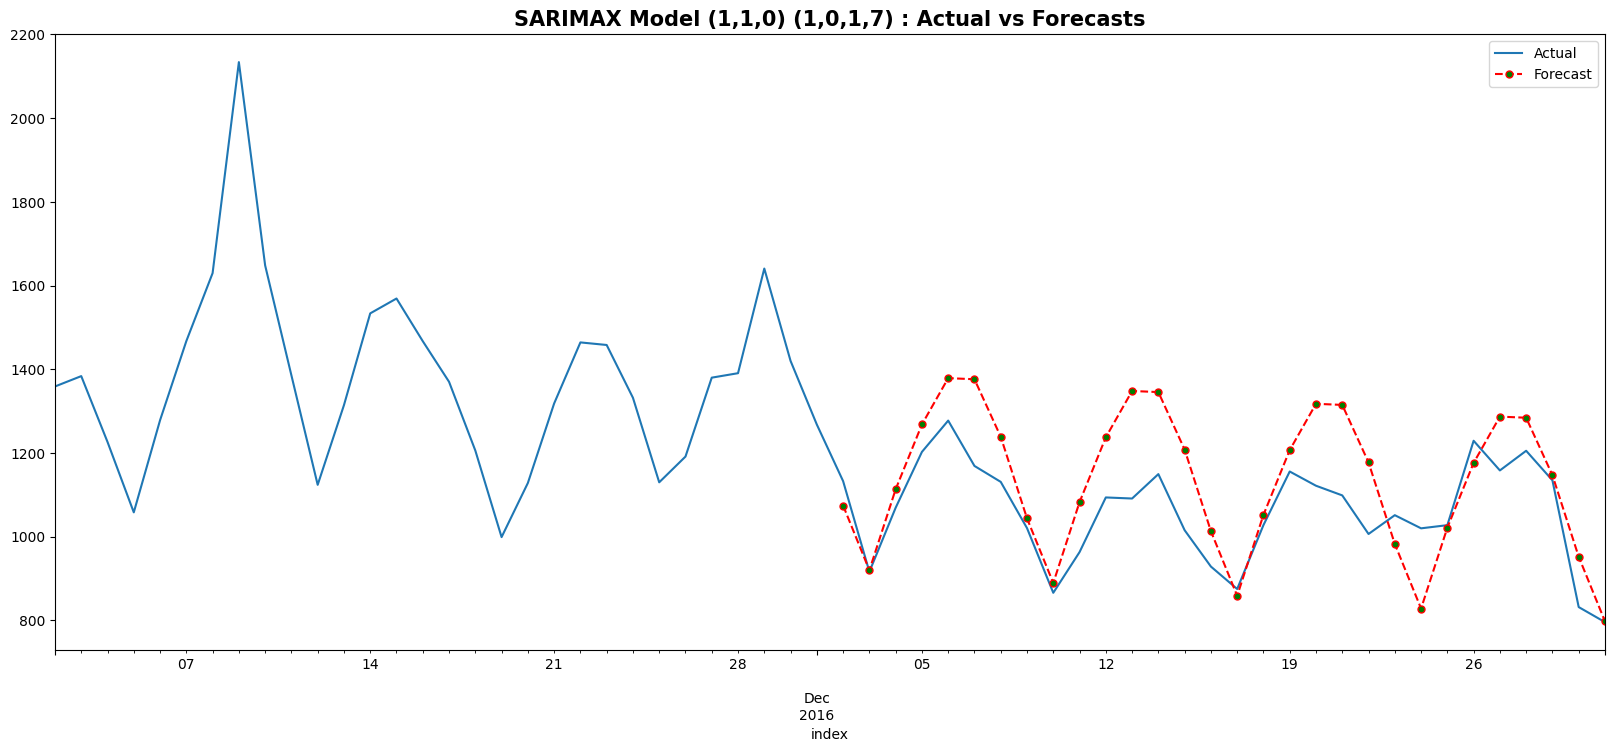

0

In [ ]:
#Plotting SARIMAX model for each Language Time Series
languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30
plot_best_SARIMAX_model(languages, data_language, n, best_param_df)

**Facebook prophet Creating a pipeline for working with multiple series**

In [ ]:
from prophet import Prophet

In [ ]:
time_series = data_language
time_series = time_series.reset_index()
time_series = time_series[['index', 'English']]
time_series.columns = ['ds', 'y']
exog = exo_data.copy(deep = True)
time_series['exog'] = exog.values

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevnm2pth/5u7dwyle.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevnm2pth/cngvpaoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66172', 'data', 'file=/tmp/tmpevnm2pth/5u7dwyle.json', 'init=/tmp/tmpevnm2pth/cngvpaoq.json', 'output', 'file=/tmp/tmpevnm2pth/prophet_modelog3zsxpe/prophet_model-20240108163201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:32:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:32:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


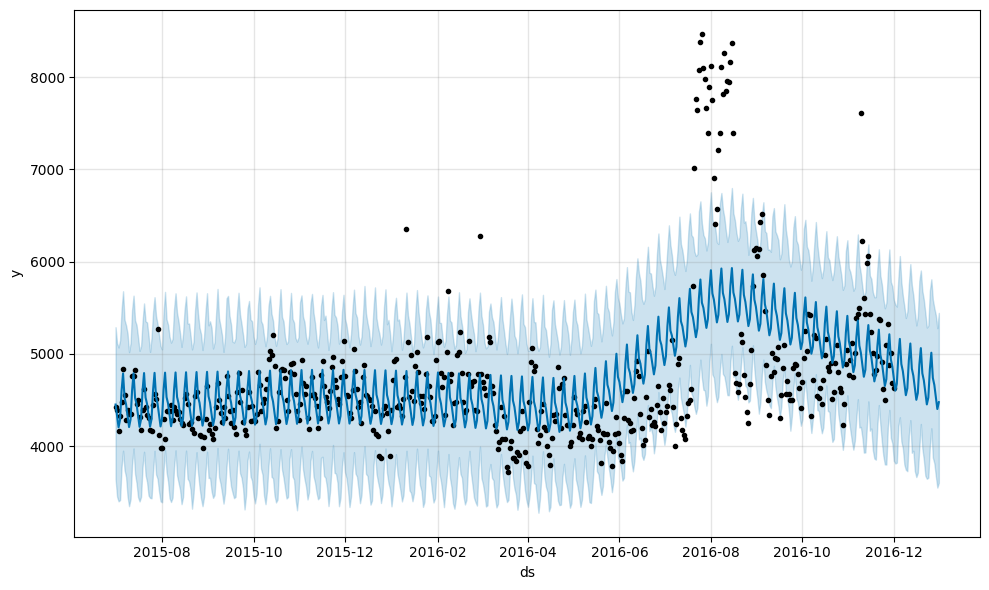

In [ ]:
prophet1 = Prophet(weekly_seasonality=True)
prophet1.fit(time_series[['ds', 'y']][:-30])
future = prophet1.make_future_dataframe(periods=30, freq= 'D')
forecast = prophet1.predict(future)
fig1 = prophet1.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevnm2pth/o_4dxefo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpevnm2pth/u2tgvqqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16523', 'data', 'file=/tmp/tmpevnm2pth/o_4dxefo.json', 'init=/tmp/tmpevnm2pth/u2tgvqqr.json', 'output', 'file=/tmp/tmpevnm2pth/prophet_modelu6f0f8se/prophet_model-20240108163210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:32:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:32:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


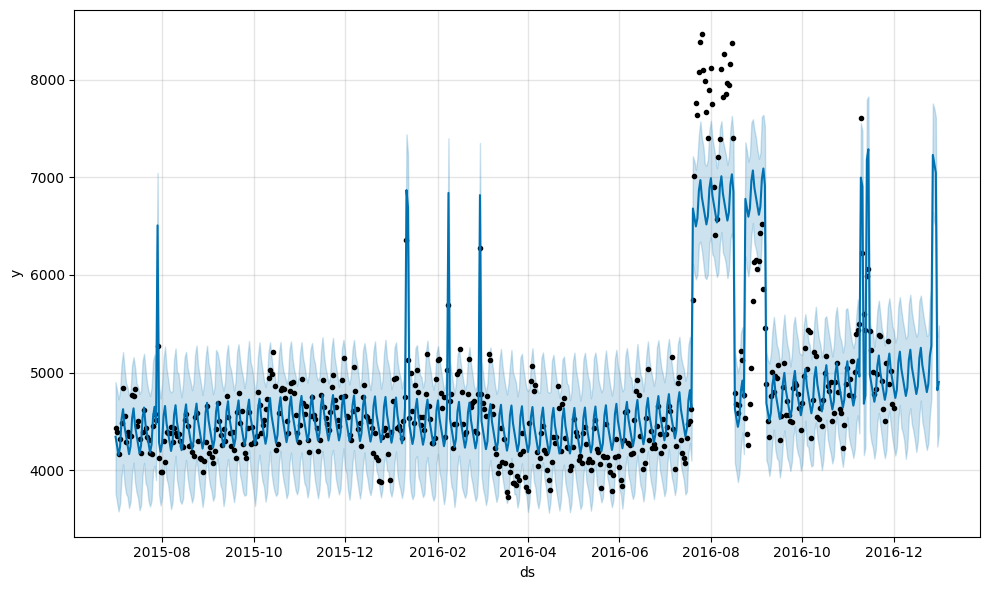

In [ ]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('exog')
prophet2.fit(time_series[:-30])
#future2 = prophet2.make_future_dataframe(periods=30, freq= 'D')
forecast2 = prophet2.predict(time_series)
fig2 = prophet2.plot(forecast2)

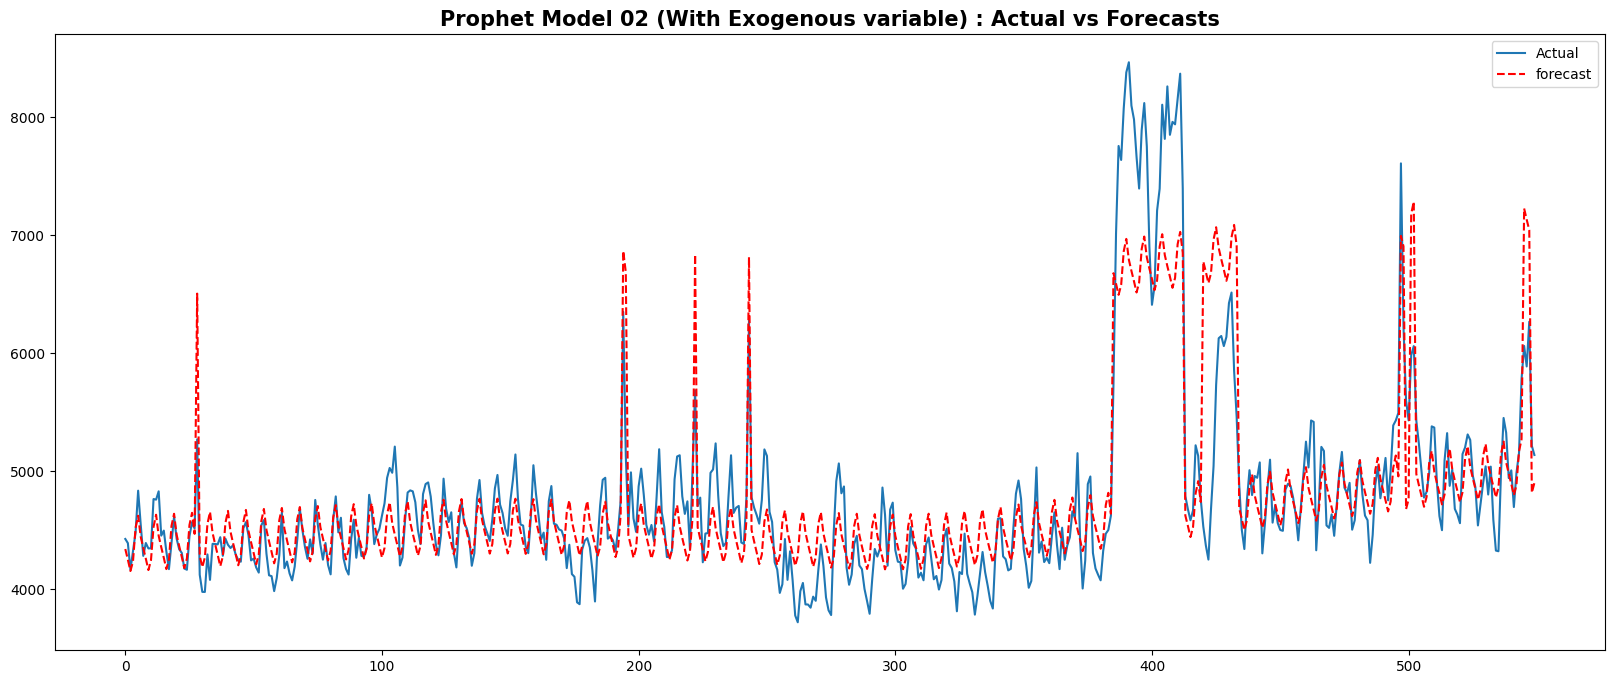

In [ ]:
actual = time_series['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'red', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

In [ ]:
errors = abs(actual - forecast)
mape = np.mean(errors/abs(actual))
mape

0.05652678906720229

In [ ]:
new_row = ['English', 1,1,1,2,1,1,7, 0.04189]
best_param_df.loc[len(best_param_df)] = new_row

best_param_df.sort_values(['mape'], inplace = True)
best_param_df

,language,p,d,q,P,D,Q,s,mape
0,Chinese,0,0,2,2,0,1,7,0.03379
6,English,1,1,1,2,1,1,7,0.04189
4,Russian,2,0,2,2,0,2,7,0.05002
1,French,0,0,2,2,1,2,7,0.06224
2,German,1,0,1,2,0,1,7,0.06312
3,Japenese,0,0,2,0,1,1,7,0.07282
5,Spanish,1,1,0,1,0,1,7,0.09193


In [ ]:
mean_visits = pd.DataFrame(data_language.mean()).reset_index()
mean_visits.columns = ['language', 'mean_visits']
df_visit_mape = best_param_df.merge(mean_visits, on = 'language')

In [ ]:
df_visit_mape

,language,p,d,q,P,D,Q,s,mape,mean_visits
0,Chinese,0,0,2,2,0,1,7,0.03379,367.005355
1,English,1,1,1,2,1,1,7,0.04189,4759.397633
2,Russian,2,0,2,2,0,2,7,0.05002,1000.256973
3,French,0,0,2,2,1,2,7,0.06224,671.810535
4,German,1,0,1,2,0,1,7,0.06312,937.131519
5,Japenese,0,0,2,0,1,1,7,0.07282,826.062413
6,Spanish,1,1,0,1,0,1,7,0.09193,1276.977081


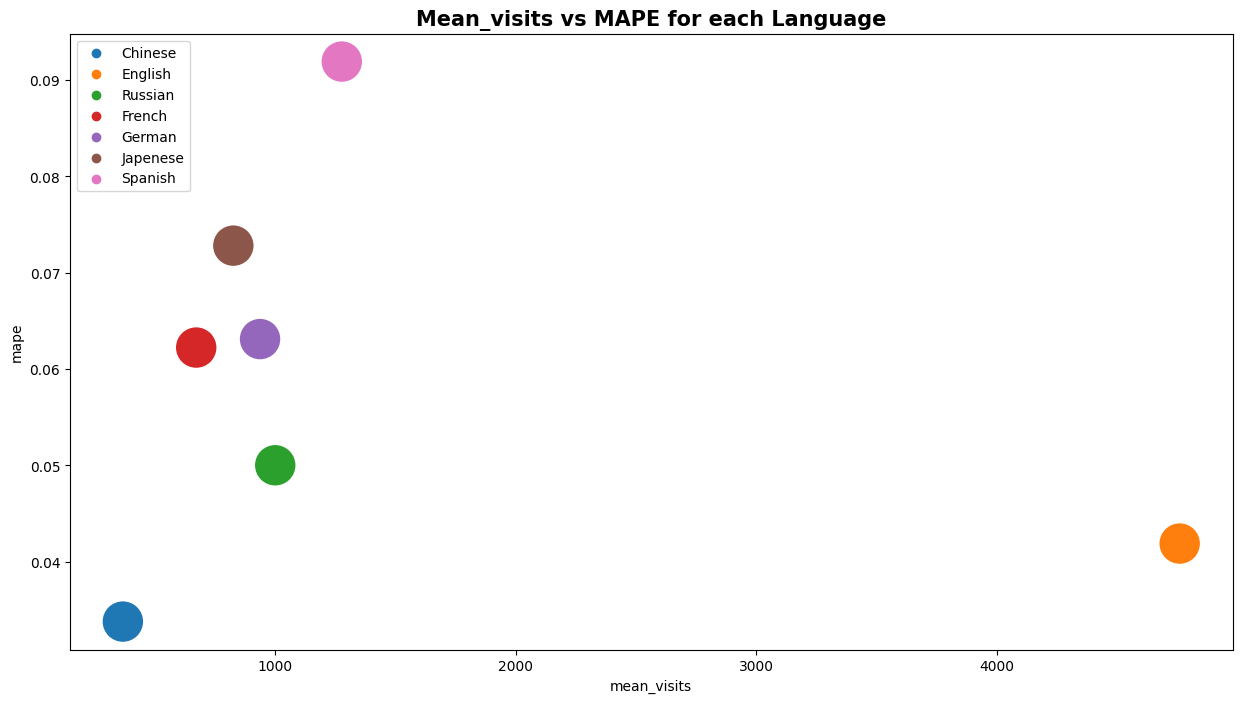

In [ ]:
plt.figure(figsize = (15,8))
san.scatterplot(x="mean_visits", y="mape", hue="language", data=df_visit_mape, s=1000 )
plt.legend(loc="upper left")
plt.title(f'Mean_visits vs MAPE for each Language', fontsize = 15, fontweight = 'bold')
plt.show()

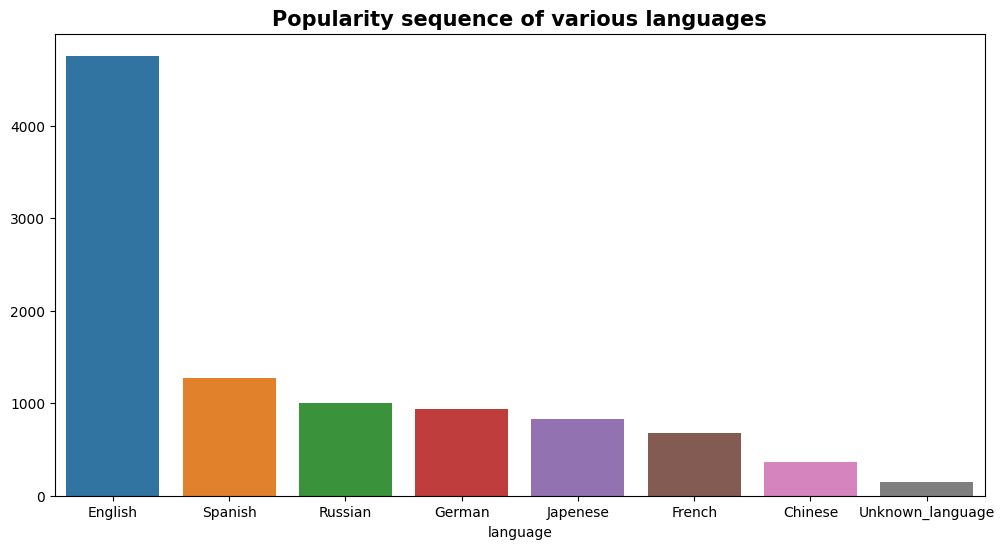

In [ ]:
x = data_language.mean().sort_values(ascending = False).index
y = data_language.mean().sort_values(ascending = False).values

plt.figure(figsize=(12, 6))
san.barplot(x=x,y=y)
plt.title(f'Popularity sequence of various languages', fontsize = 15, fontweight = 'bold')
plt.show()

**Insight and Recommendation**

There are 145063 rows and 551 columns in train_1.csv file and 550 rows and 1 column in Exog_Campaign_eng.

Data for 550 Dates almost 1.5 Years is provided for all pages.

**Write 3 inferences you made from the data visualizations**

Most frquently searched pages have language English and then Chinese There are almost 18000 entries having unknown language consits of other langauge like hindi, arabic parsi etc. Ad should be placed in pages where contents in english.

24.8% access by mobile 24% by desktop and 51.2% have all types. There is no any entry where access_type is not mentioned.

All_agents in 65.9% page entries and spider in 24.%.


**What does the decomposition of series do?**
- The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.
- There are two principal types of decomposition : Additive & Multiplicative.
- In present business case we have used Additive Model for deconstructing the time series. The term additive means individual components (trend, seasonality, and residual) are added together as shown in equation below:

$y_{t}$ =  $T_{t}$ +  $S_{t}$  +  $R_{t}$

where
- $y_{t}$ = actual value in time series
- $T_{t}$ = trend in time series
- $S_{t}$ = seasonality in time series
- $R_{t}$ = residuals of time series

**What level of differencing gave you a stationary series?**
- A non-stationary time series can be converted to a stationary time series through a technique called differencing. Differencing series is the change between consecutive data points in the series.

$y'_{t}$ =  $y_{t}$ -  $y_{t-1}$

This is called first order differencing.

- In some cases, just differencing once will still yield a nonstationary time series. In that case a second order differencing is required.

- Seasonal differencing is the change between the same period in two different seasons. Assume a season has period, m

$y'_{t}$ =  $y_{t}$ -  $y_{t-m}$

- Once the time series becomes stationary, no differencing is required.

**Difference between arima, sarima & sarimax.**

- The **ARIMA model** is an ARMA model yet with a preprocessing step included in the model that we represent using I(d). I(d) is the difference order, which is the number of transformations needed to make the data stationary. So, an ARIMA model is simply an ARMA model on the differenced time series.

In **SARIMA models** there is an additional set of autoregressive and moving average components.The additional lags are offset by the frequency of seasonality (ex. 12 — monthly, 24 — hourly). SARIMA models allow for differencing data by seasonal frequency, yet also by non-seasonal differencing.

 **SARIMAX model** takes into account exogenous variables, or in other words, use external data in our forecast. Some real-world examples of exogenous variables include gold price, oil price, outdoor temperature, exchange rate.


**Compare the number of views in different languages**

Mean number of views (Popularity sequence) of various languages have the following :
English > Spanish > Russian > German > Japenese > French > Chinese
plotting in Datavisualization part.

**What other methods other than grid search would be suitable to get the model for all languages?**

Deep understanding of Domain / Business or relevant experience in the same field can be good starting point for estimating the parameters of the model intiuitavely.

Second level estimation can come from ACF & PACF plots of the time series. We can take following steps for estimation of p, q, d:

Test for stationarity using the augmented dickey fuller test.
If the time series is stationary try to fit the ARMA model, and if the time series is non-stationary then seek the value of d.
If the data is getting stationary then draw the autocorrelation and partial autocorrelation graph of the data.
Draw a partial autocorrelation graph(ACF) of the data. This will help us in finding the value of p because the cut-off point to the PACF is p.
Draw an autocorrelation graph(ACF) of the data. This will help us in finding the value of q because the cut-off point to the ACF is q.